In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
# from skimage.draw import circle
from numpy.fft import fft2,ifft2,fftshift,ifftshift
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from tqdm import tqdm

## 2D Sinusoid

`sin_cart(f_x, f_y, phi)` - generates a 2D sinusoid image based on (f_x, f_y) coordinates Fourier Space 
- $f_x$ - frequency coordinate along x
- $f_y$ - frequency coordinate along y
- $r = \sqrt{f_x^2 + f_y^2}$ - actual sinusoid frequency
- $\theta = tan^{-1}(\frac{f_y}{f_x})$ - rotation of the sinusoid
- $\phi$ = phase shift of the sinusoid ($\Delta \phi = \frac{2 \pi}{3}$, where n = {0,1,2})

In [3]:
def sin_cart(f_x, f_y, phi): #with phase shift `phi`
    x = np.linspace(0,np.pi, 128)
    X,Y = np.meshgrid(x,x)
    r = np.sqrt(f_x**2 + f_y**2) #frequency 
    if f_x == 0: theta = np.pi/2 #avoid zero error for `arctan`
    else: theta = np.arctan(f_y/f_x)
    Z = np.cos(2*r*(Y*np.sin(theta)+X*np.cos(theta)) + phi)
    Z = (Z+1)/2 #shift values sinusoid range from [-1,1] to [0,1]
    return Z #return a sinusoid image

## Fast Fourier Transform (FFT)

- Aperture `R(x,y)` - input image
- FFT(Aperture) `r(f_x,f_y)` - FFT of input image
- LOG(Aperture) `log(r(f_x,f_y))` - logscale of FFT (for visualization purposes)

In [11]:
def FFT(aperture):
    cmap = 'inferno'
    fig = plt.figure(figsize=(20,60))
    ax1 = fig.add_subplot(131)
    im1 = ax1.imshow(aperture, cmap = cmap)
    plt.title('Aperture')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')
    
    ft_aperture = fft2(aperture)
    FT_aperture = fftshift(np.abs(ft_aperture))
    
    ax2 = fig.add_subplot(132)
    im2 = ax2.imshow(FT_aperture, cmap = cmap)

    plt.title('FFT')
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')
    
    ax3 = fig.add_subplot(133)
    im3 = ax3.imshow(np.log(FT_aperture), cmap = cmap)
    plt.title('FFT in log scale')
    plt.axhline(np.shape(aperture)[0]//2, ls = '--', color = 'white')
    plt.axvline(np.shape(aperture)[0]//2, ls = '--', color = 'white')
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im3, cax=cax, orientation='vertical')

### Sample sinusoids and their Fourier Transform

/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/714866110.py:23: RuntimeWarning: divide by zero encountered in log
  im3 = ax3.imshow(np.log(FT_aperture), cmap = cmap)


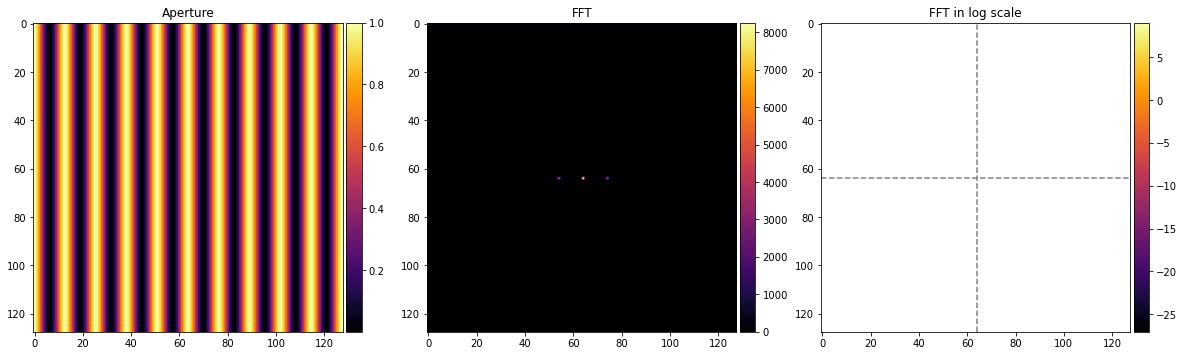

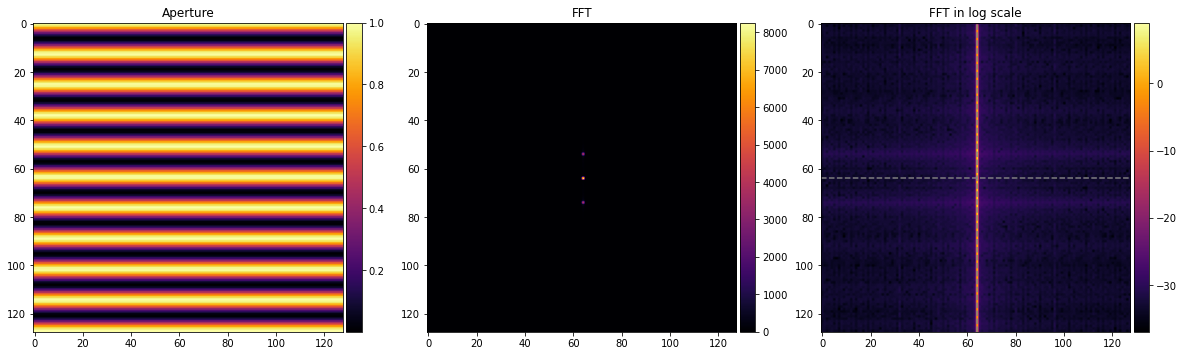

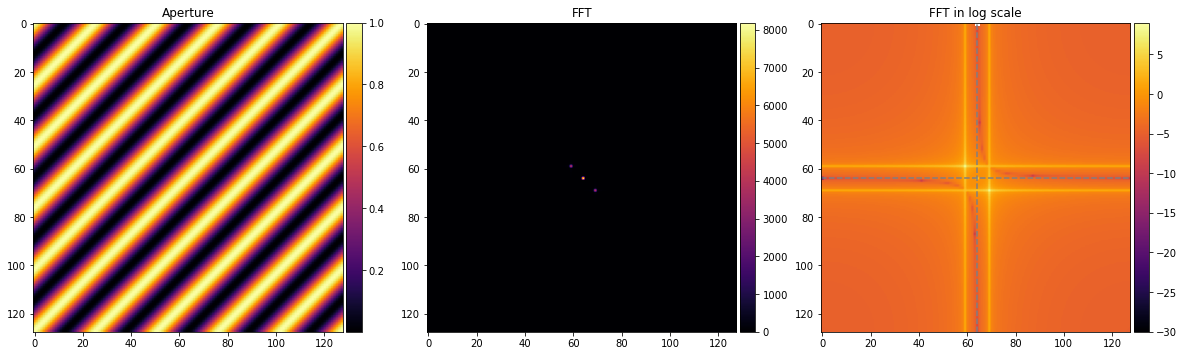

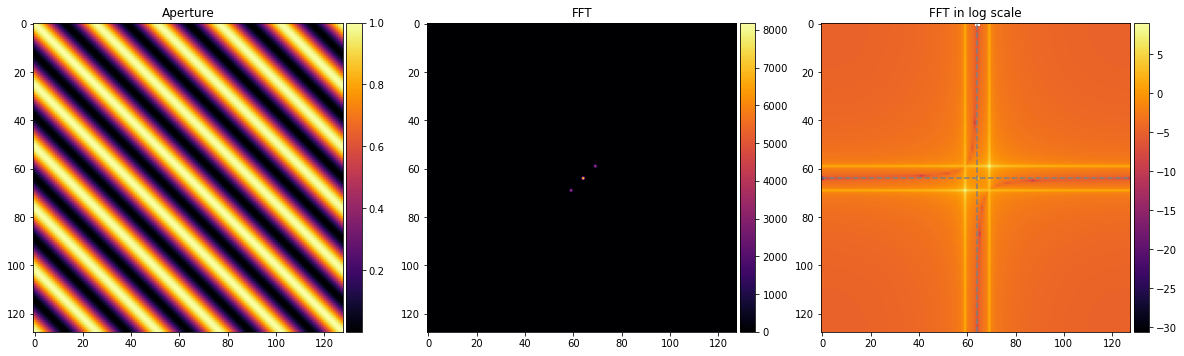

In [5]:
FFT(sin_cart(10,0, 0))
FFT(sin_cart(0,10, 0))
FFT(sin_cart(5,5, 0))
FFT(sin_cart(5,-5, 0))

### Shifting the phase of the sinusoid

/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/714866110.py:23: RuntimeWarning: divide by zero encountered in log
  im3 = ax3.imshow(np.log(FT_aperture), cmap = cmap)


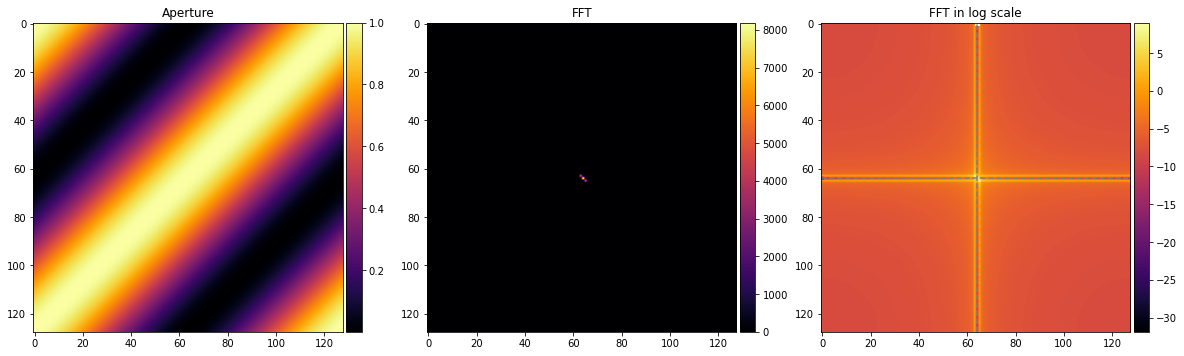

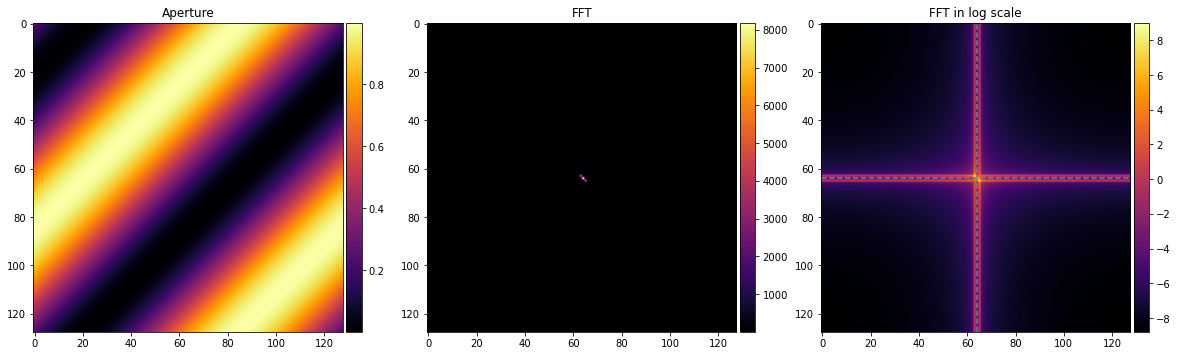

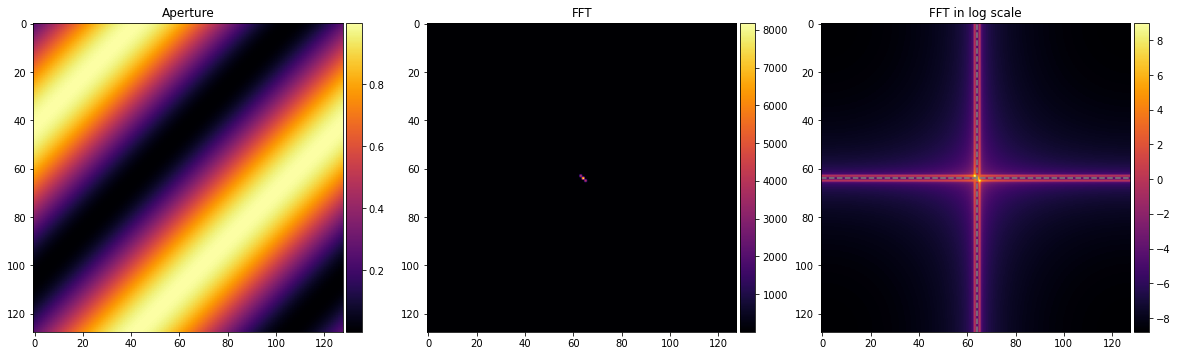

In [6]:
FFT(sin_cart(1,1, 0))
FFT(sin_cart(1,1, 2*np.pi/3))
FFT(sin_cart(1,1, 4*np.pi/3))

# Fourier Ghost Imaging (FGI) Algorithm

## Loading test image from `skimage.data.astronaut()`

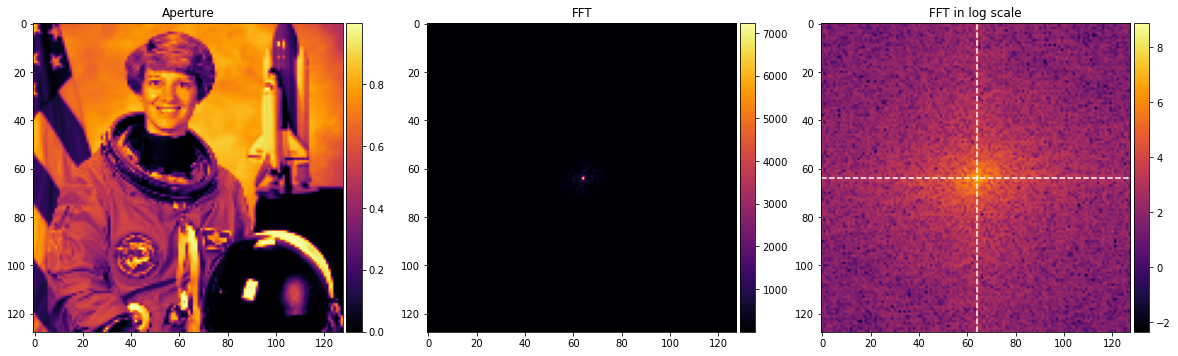

In [12]:
from skimage import color, data
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())
img = rescale(img, 0.25, anti_aliasing=False)

FFT(img)

## Illumination Patterns: $I_n(x,y:f_x, f_y)$

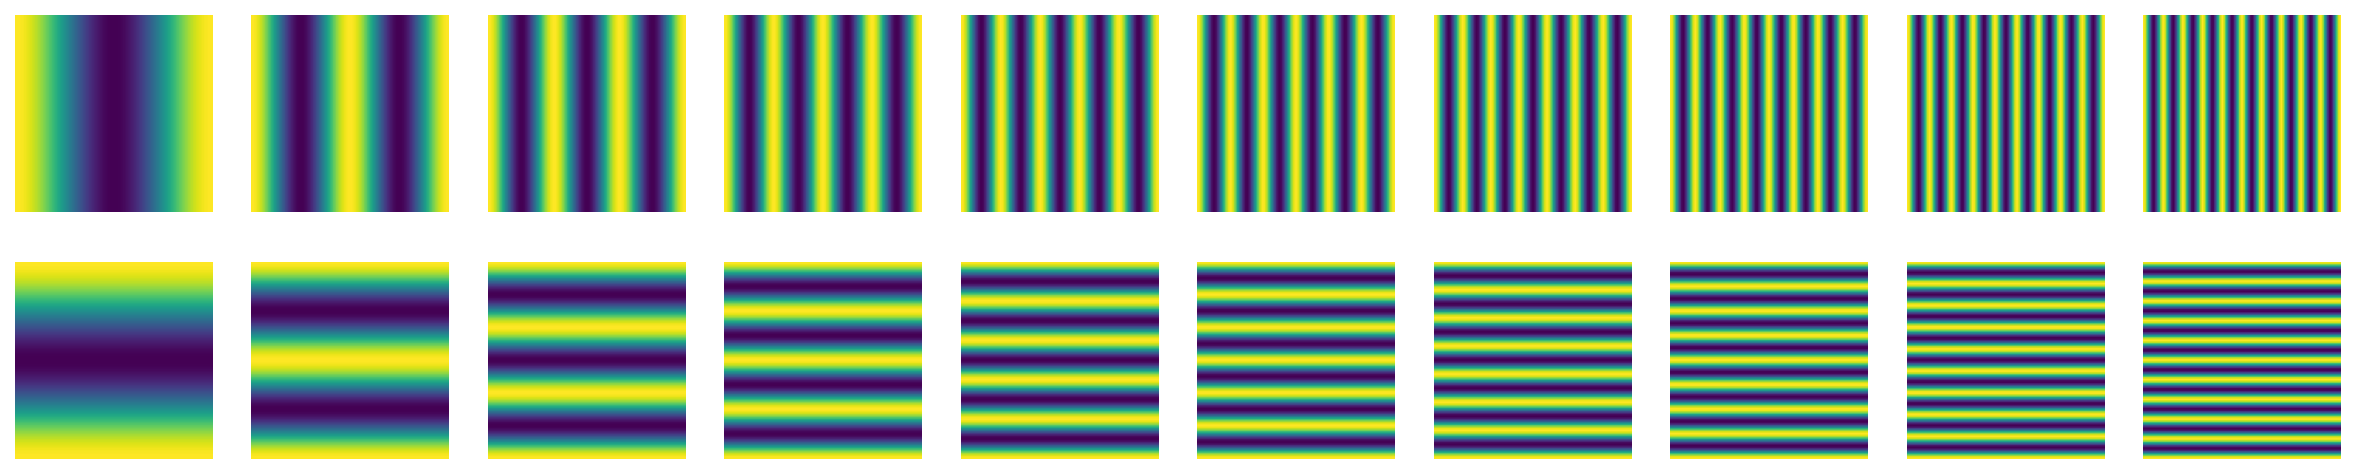

In [13]:
plt.figure(figsize = (20,4), dpi = 150)

for f_y in range(1,11):
    plt.subplot(2,10,f_y)
    plt.imshow(sin_cart(f_y,0, 0))
    plt.axis('off')
    plt.subplot(2,10,f_y+10)
    plt.imshow(sin_cart(0, f_y, 0))
    plt.axis('off')

plt.show()

### Varying the sinusoid rotation and frequencies

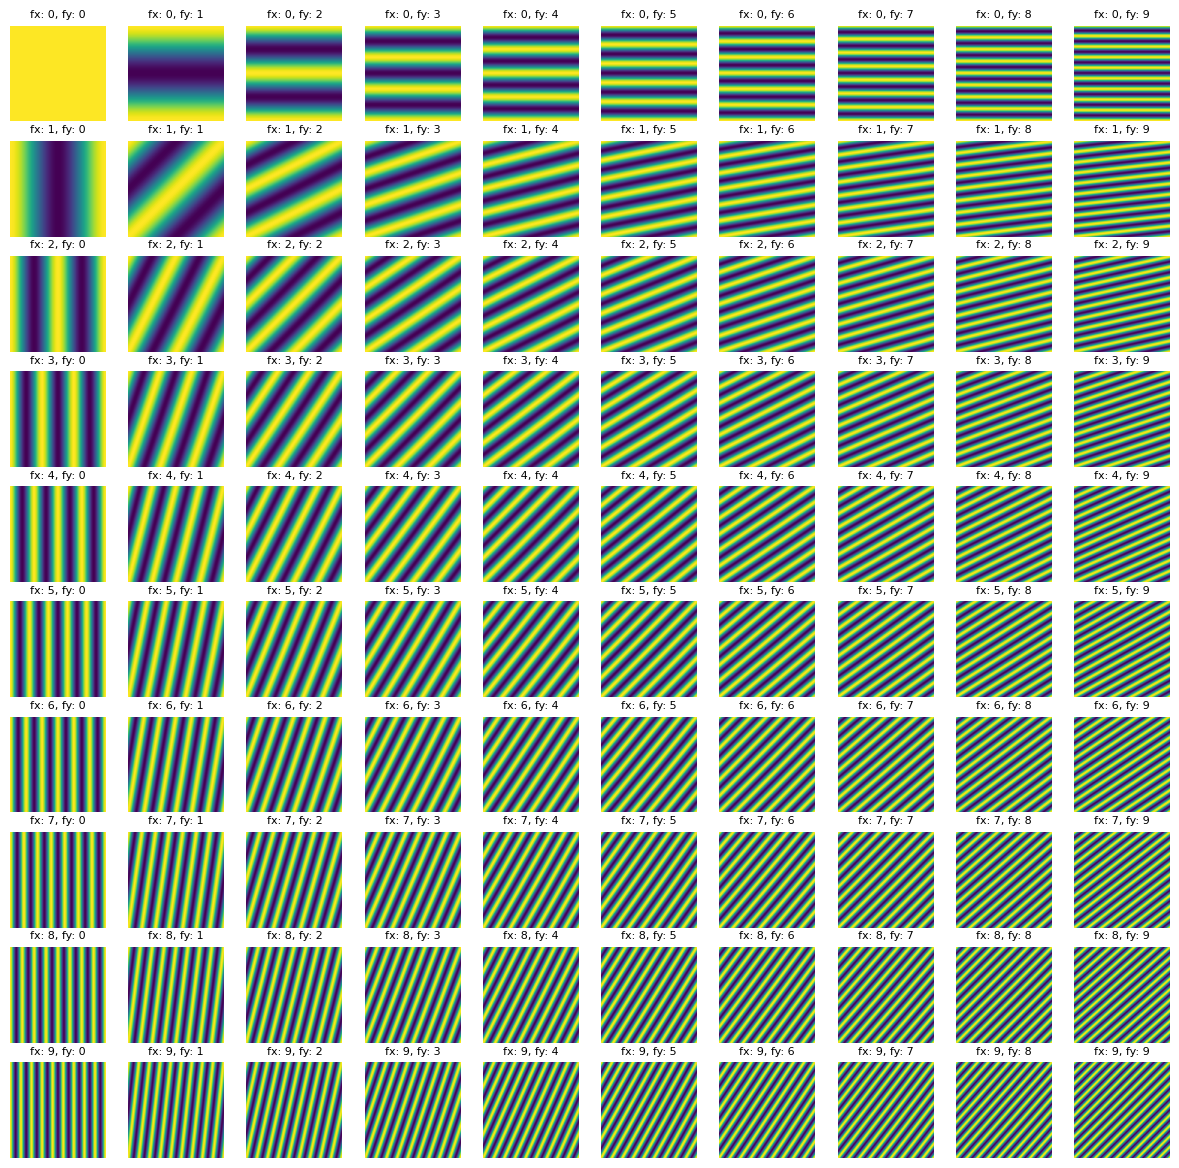

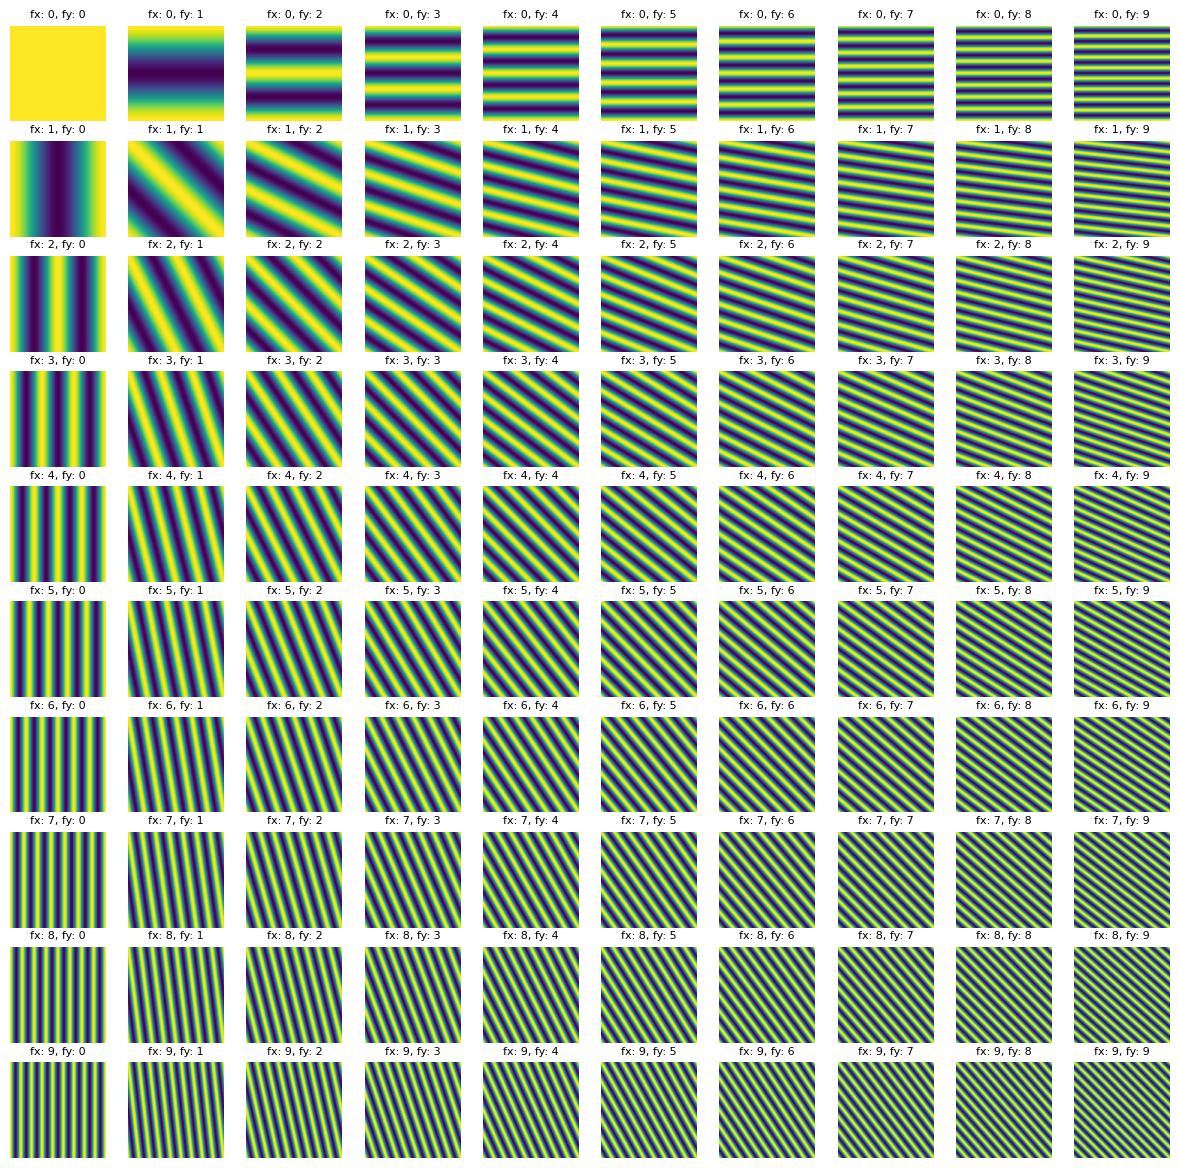

In [14]:
plt.figure(figsize = (15,15), dpi = 100)

for f_x in range(0,10):
    for f_y in range(1,11):
        plt.subplot(10,10,f_x*10 + (f_y))
        f_y = f_y - 1
        plt.imshow(sin_cart(f_x,f_y, 0), vmin = 0, vmax = 1)
        plt.title('fx: ' + str(f_x) + ', fy: ' + str(f_y), fontsize = 8)
        plt.axis('off')
plt.show()

plt.figure(figsize = (15,15), dpi = 100)

for f_x in range(0,10):
    for f_y in range(1,11):
        plt.subplot(10,10,f_x*10 + (f_y))
        f_y = f_y - 1
        plt.imshow(sin_cart(f_x,-f_y, 0), vmin = 0, vmax = 1)
        plt.title('fx: ' + str(f_x) + ', fy: ' + str(f_y), fontsize = 8)
        plt.axis('off')
plt.show()

## Illuminated Scene: $R(x,y)I_n(x,y:f_x,f_y)$

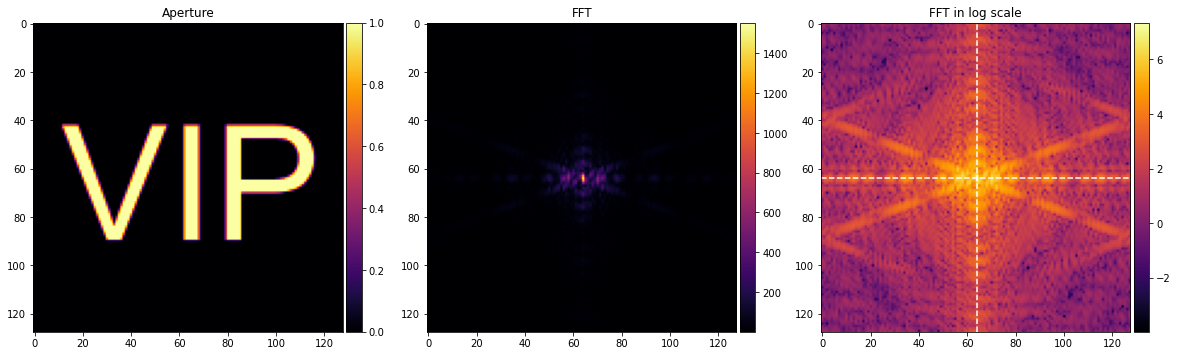

In [76]:
import skimage.io

img = skimage.io.imread('VIP.png', as_gray=True)
img = rescale(img, 0.5, anti_aliasing=False)

FFT(img)

In [57]:
from skimage.draw import disk
def Circ(r): #circle
    L = 128
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x, y = disk(center, r)
    aperture[x, y] = 1
    return aperture

In [56]:
?disk

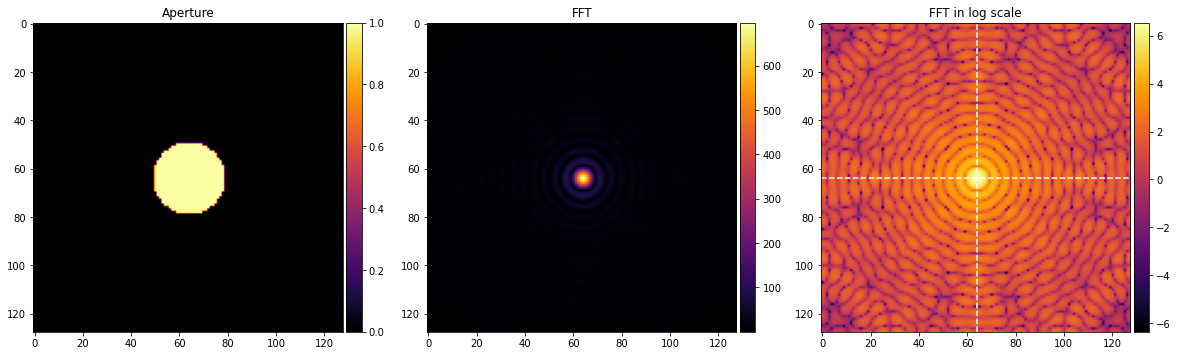

In [62]:
FFT(Circ(15))
img = Circ(15)

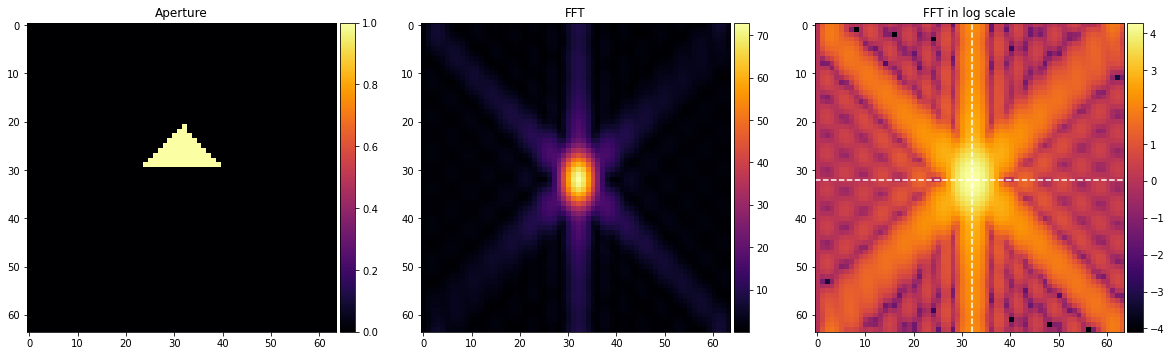

In [179]:
FFT(triangle(9))
img = triangle(9)

### Incorporating the Phase Shifts: $\phi$

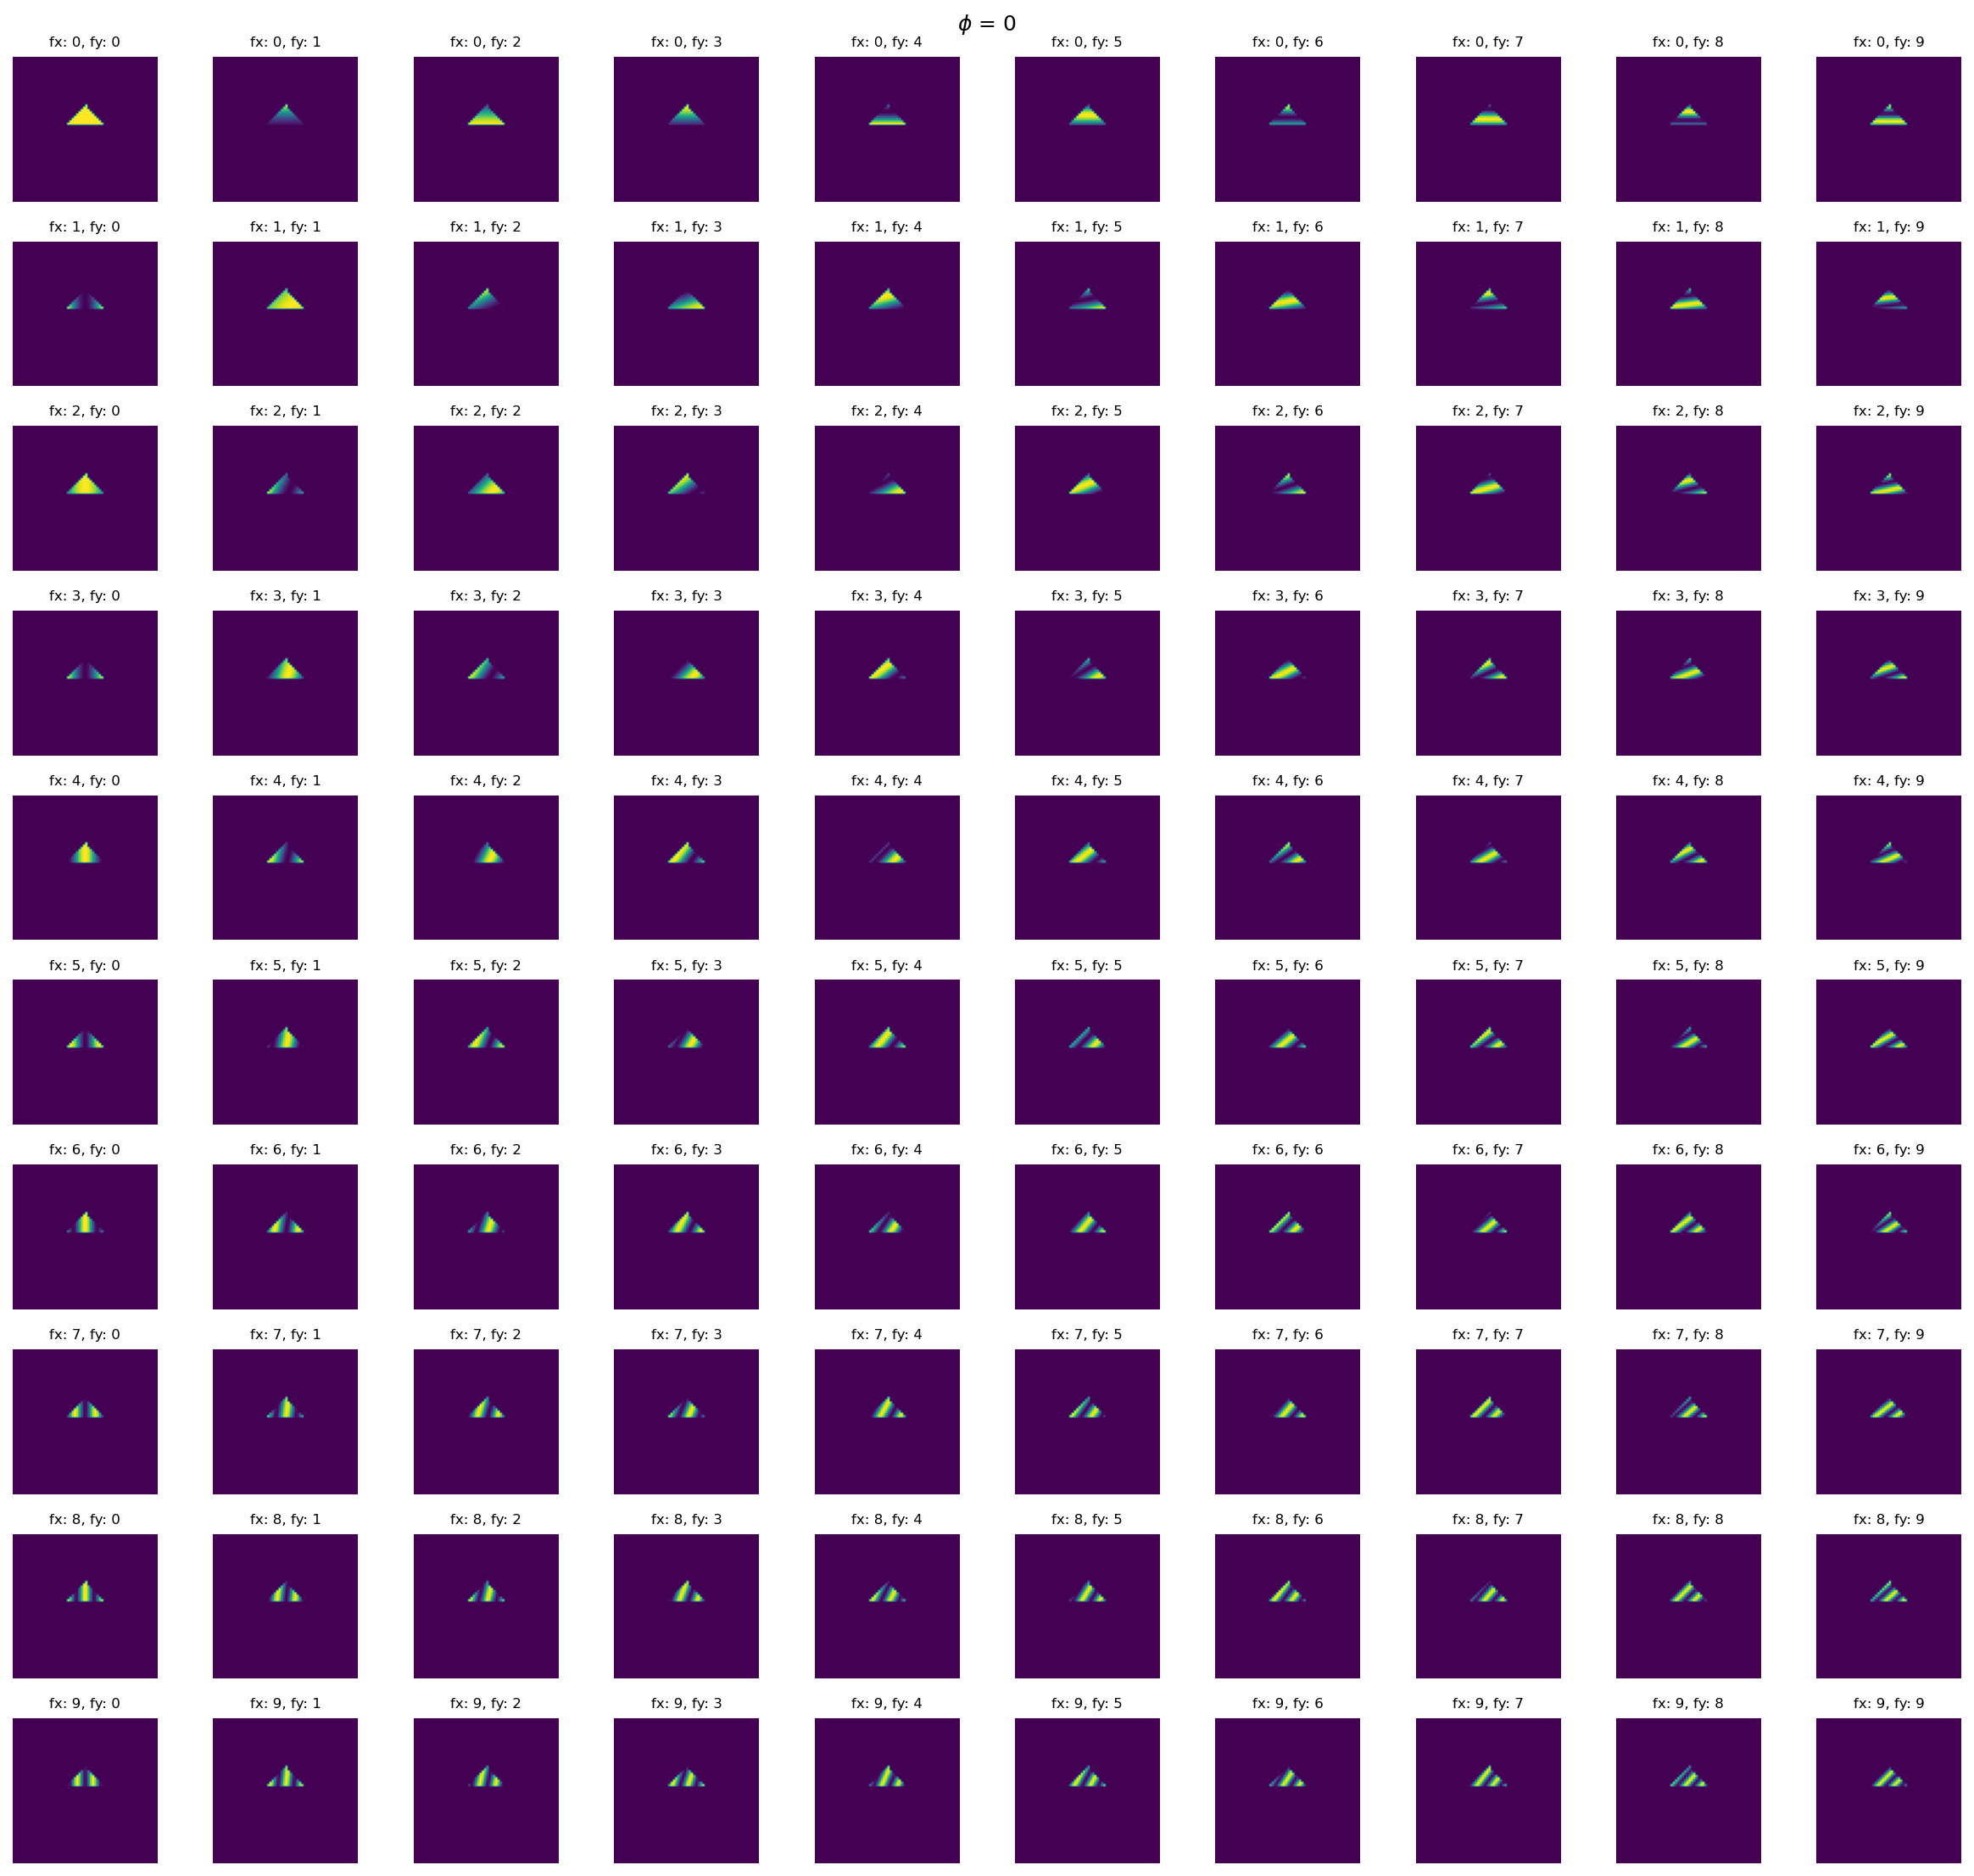

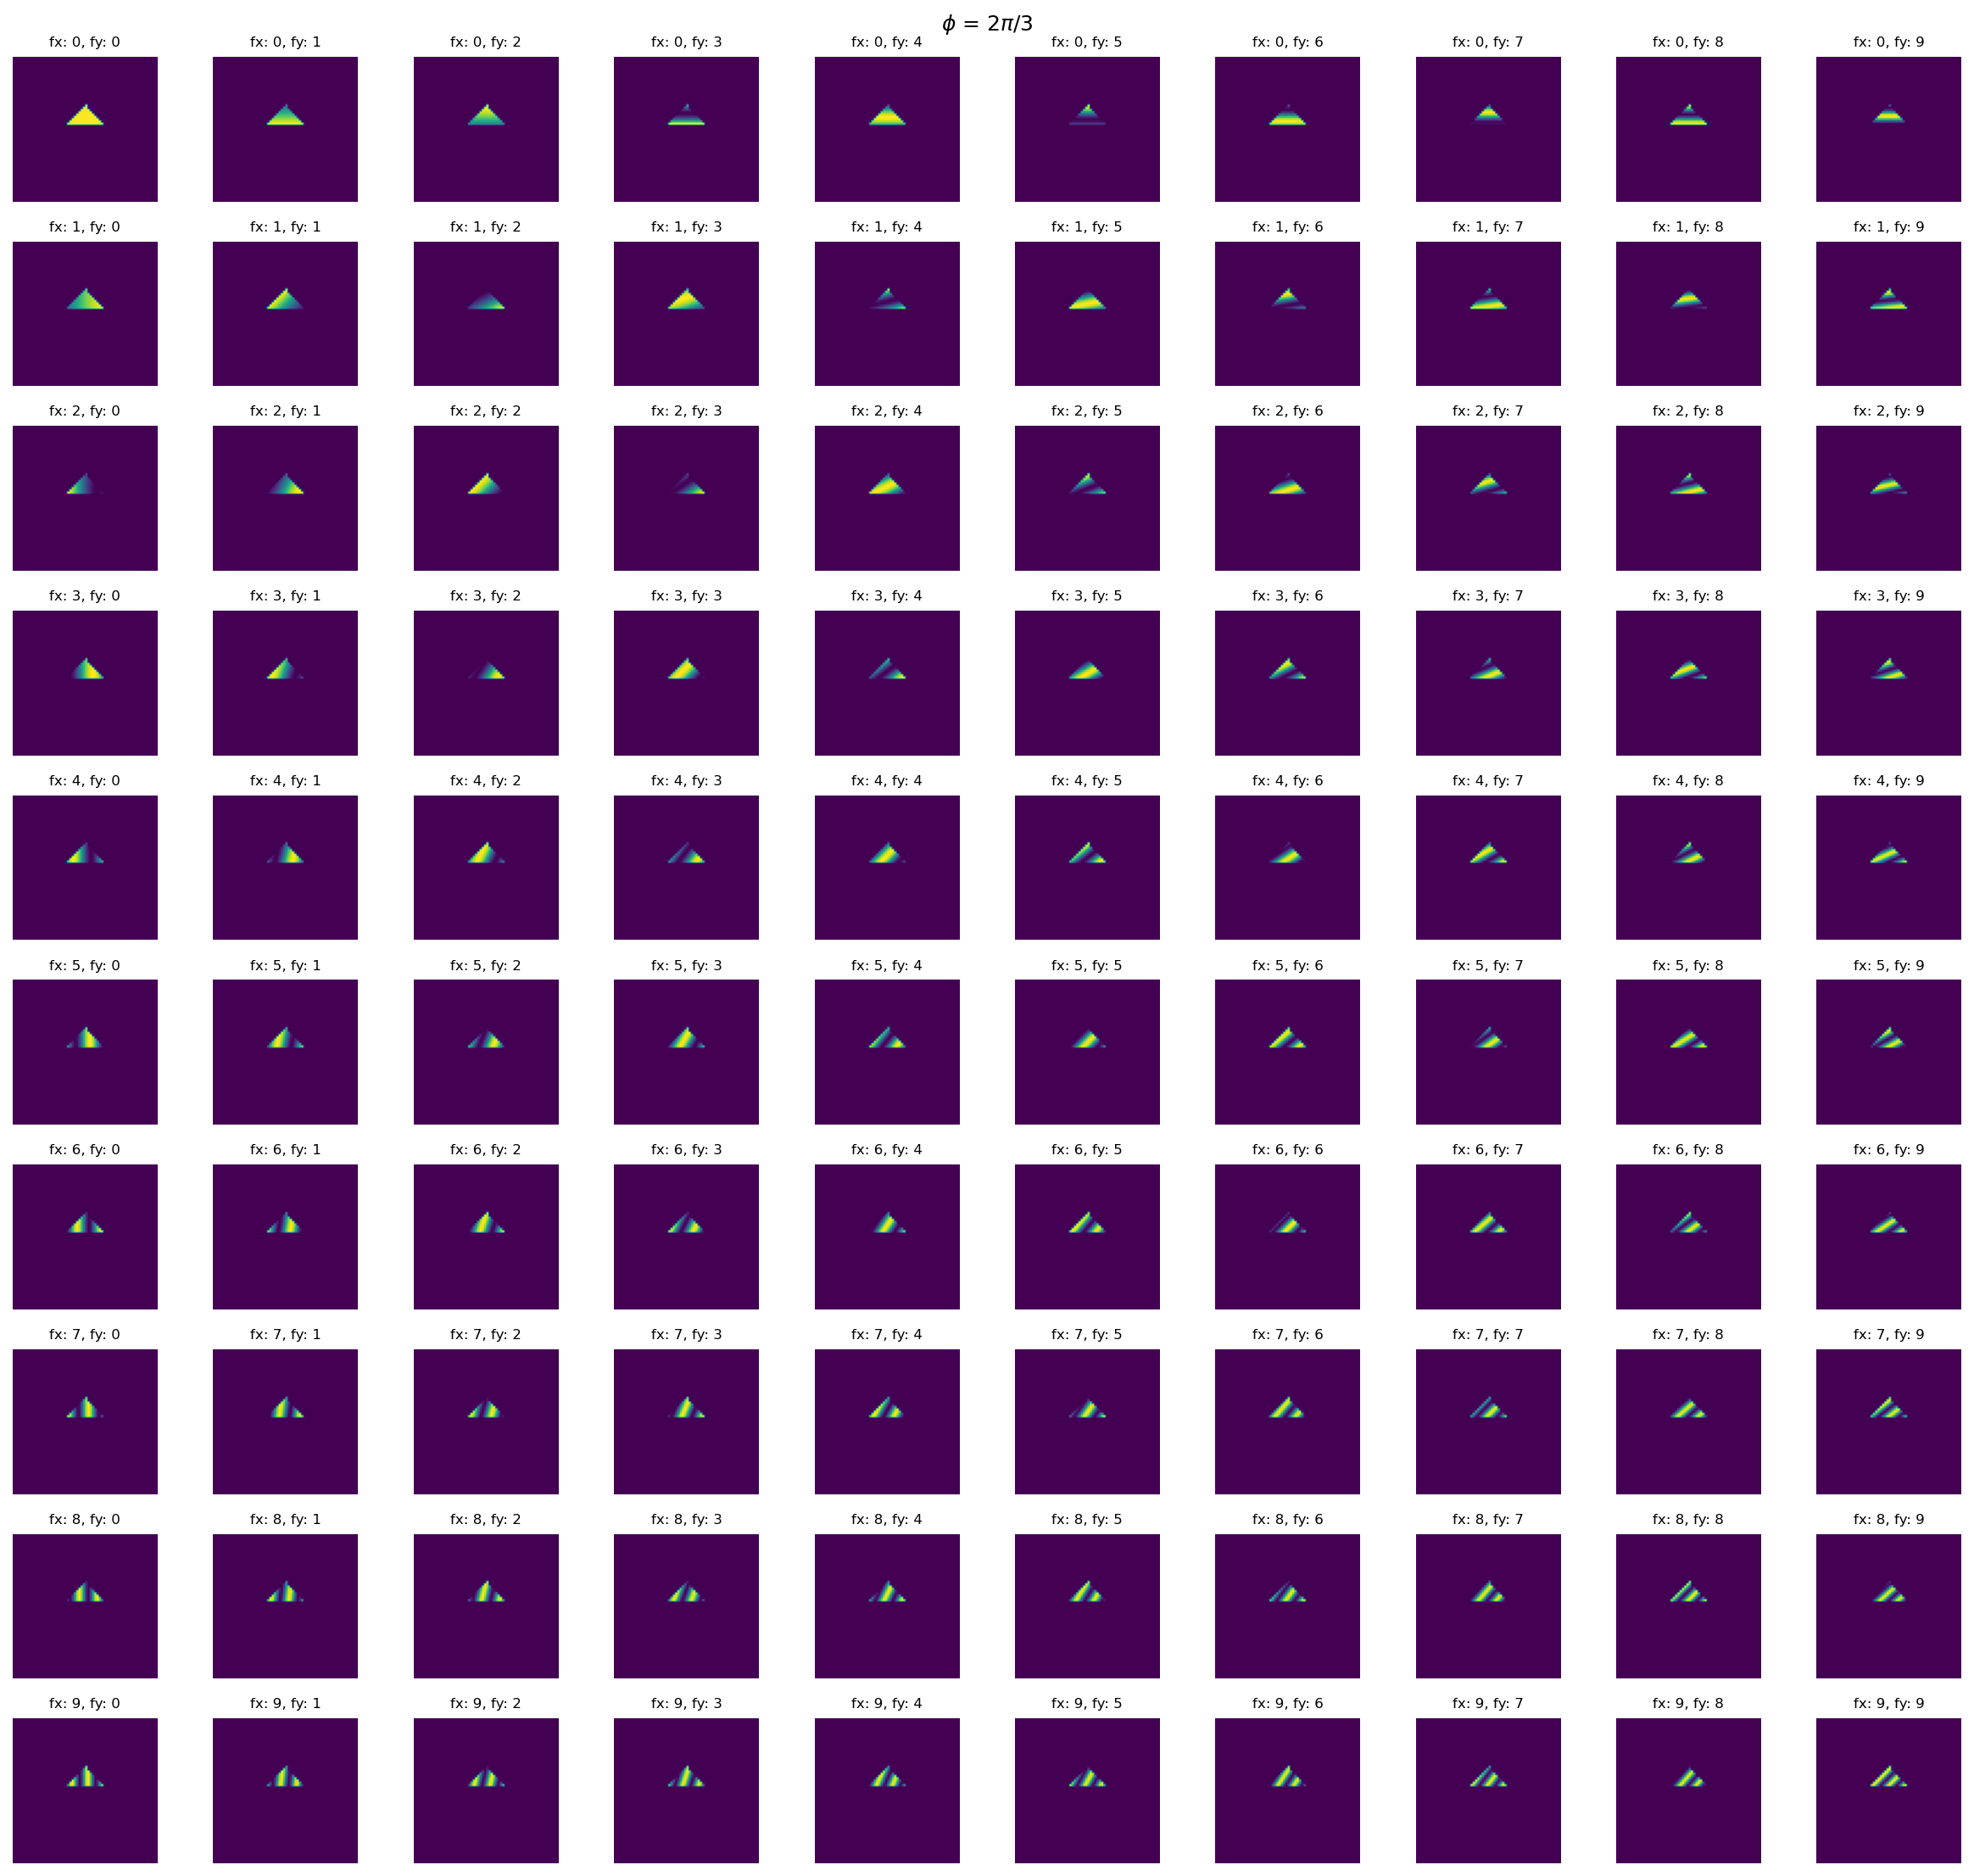

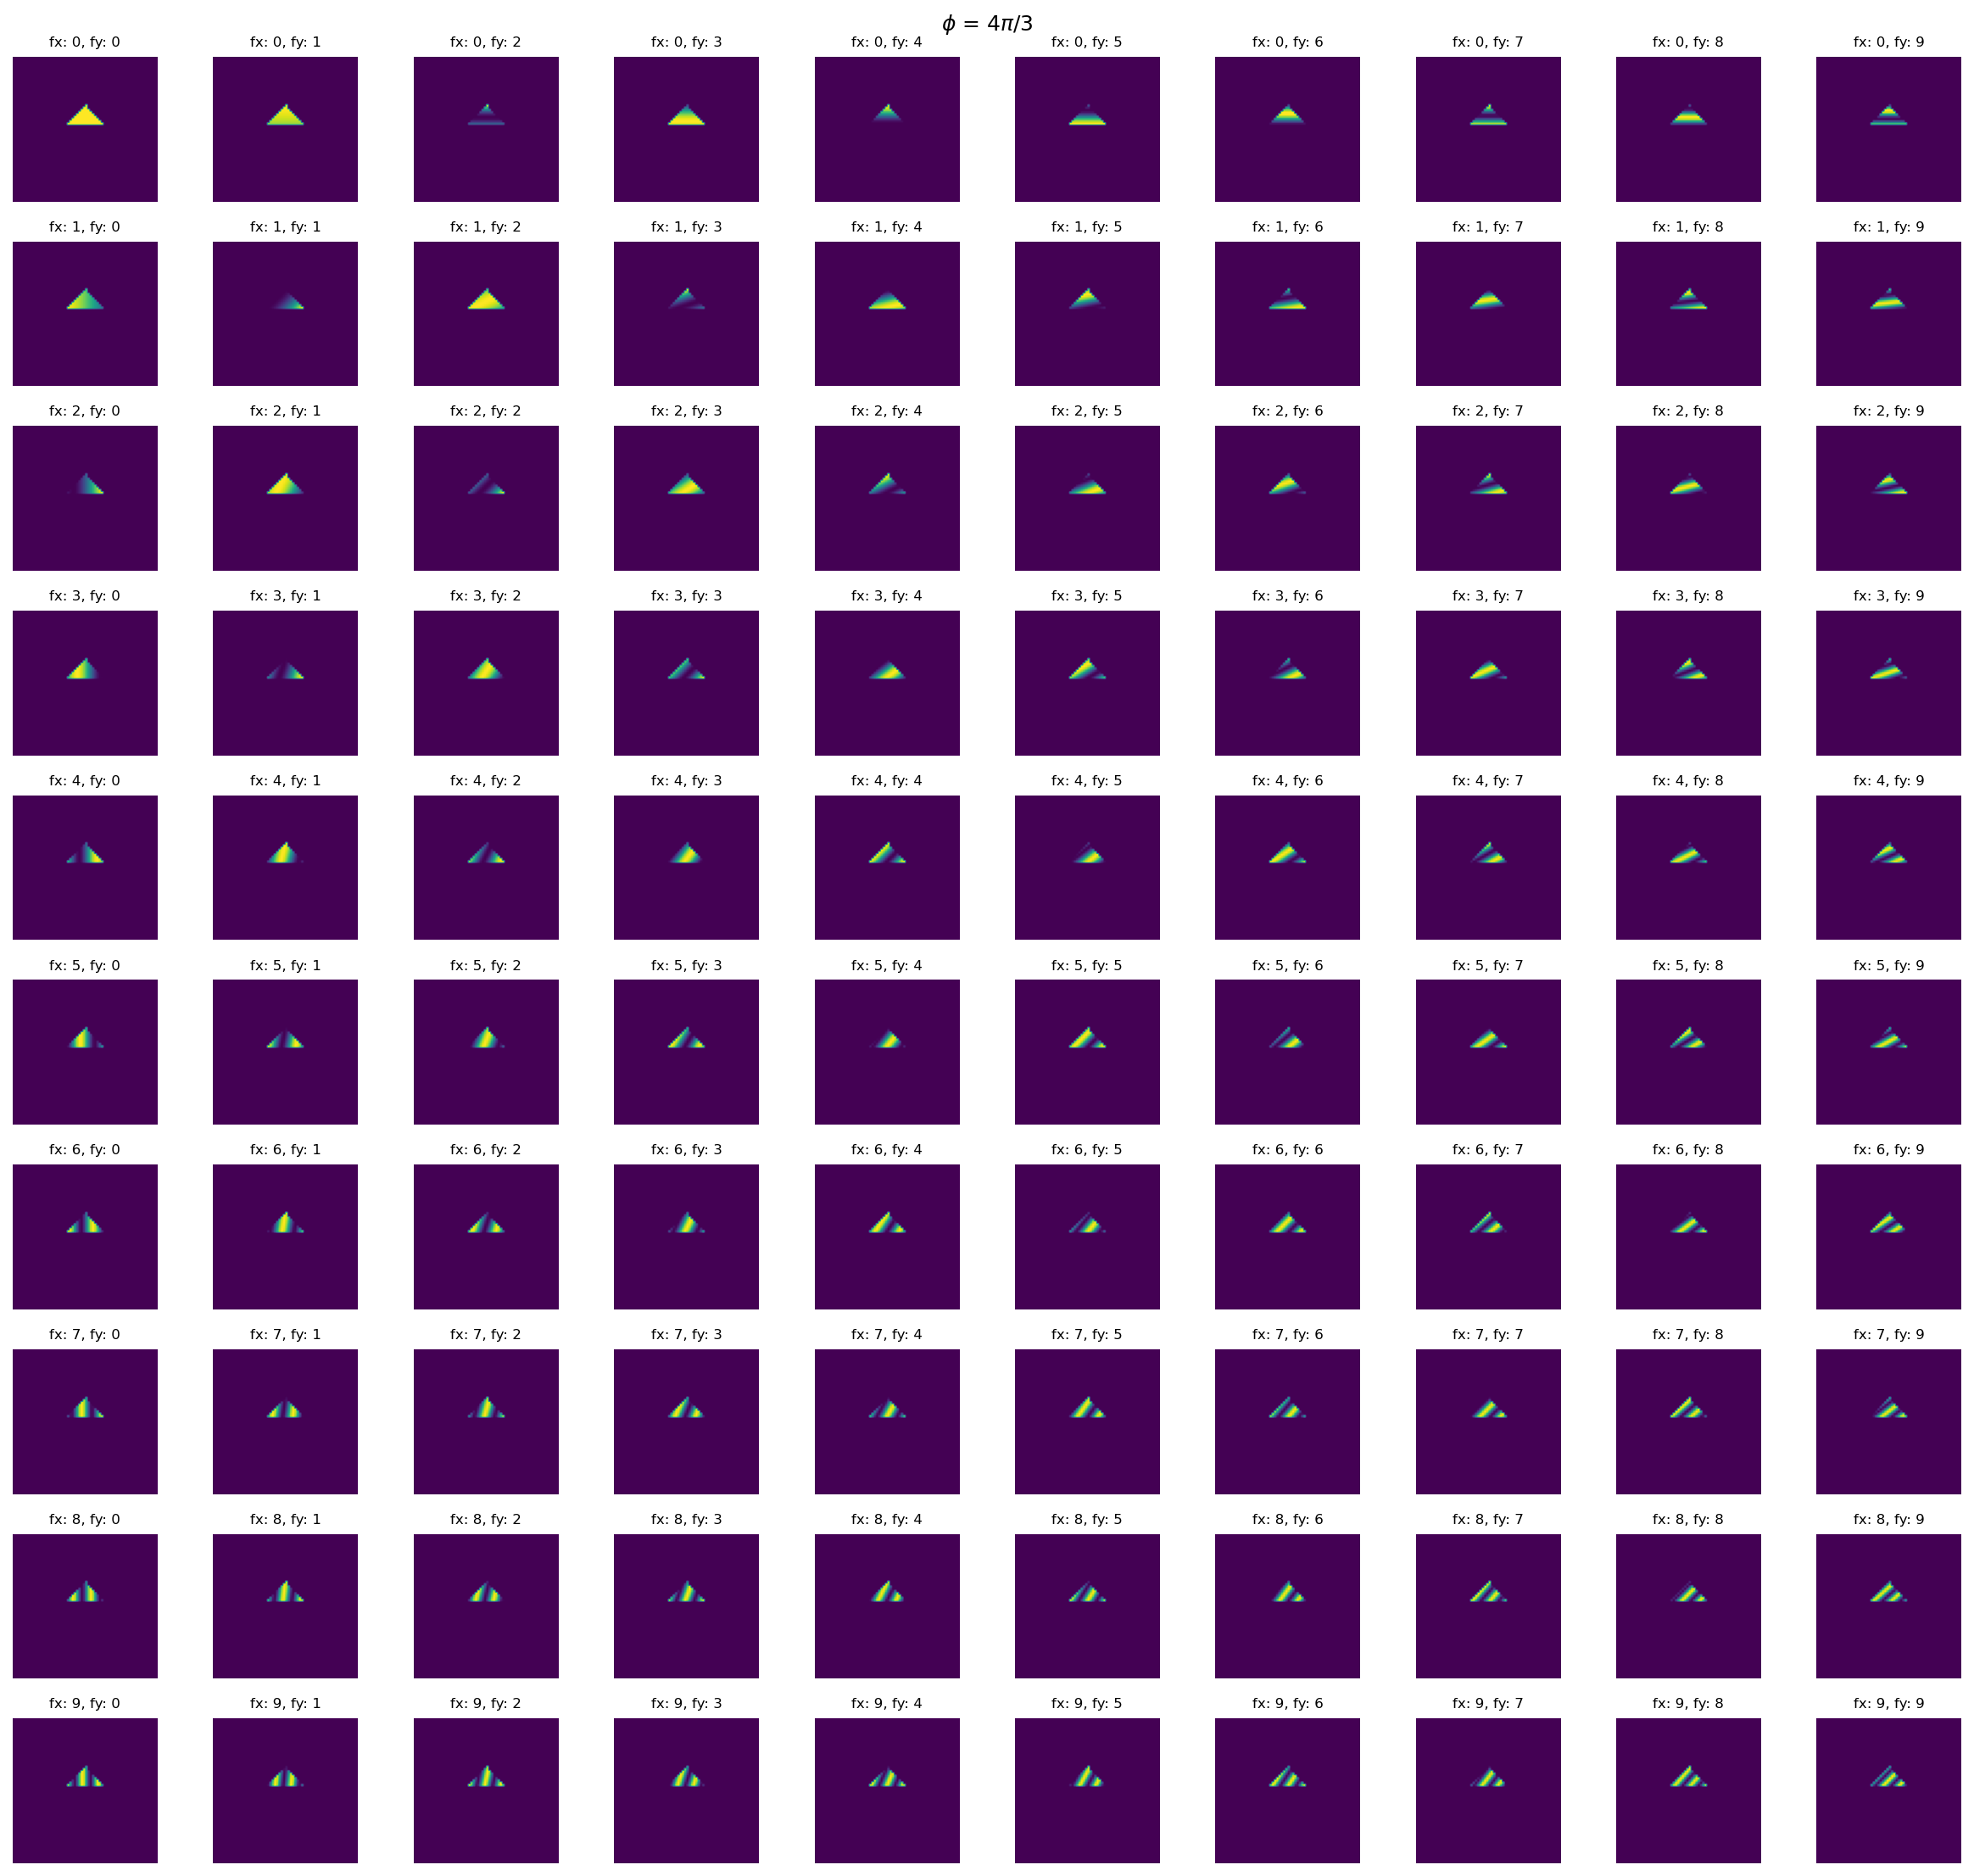

In [180]:
Phi = ["0", "$2\pi/3$", "$4\pi/3$"]

for i in range(3):
    plt.figure(figsize = (16,15), dpi = 150)
    plt.suptitle("$\phi$ = " + str(Phi[i]))
    for f_x in range(0,10):
        for f_y in range(1,11):
            plt.subplot(10,10,f_x*10 + (f_y))
            f_y = f_y - 1
            projection = img*sin_cart(f_x,f_y, i*2*np.pi/3)
            plt.imshow(projection)
            plt.title('fx: ' + str(f_x) + ', fy: ' + str(f_y), fontsize = 8)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

## Total intensity of reflected light: $E_n(f_x, f_y)$

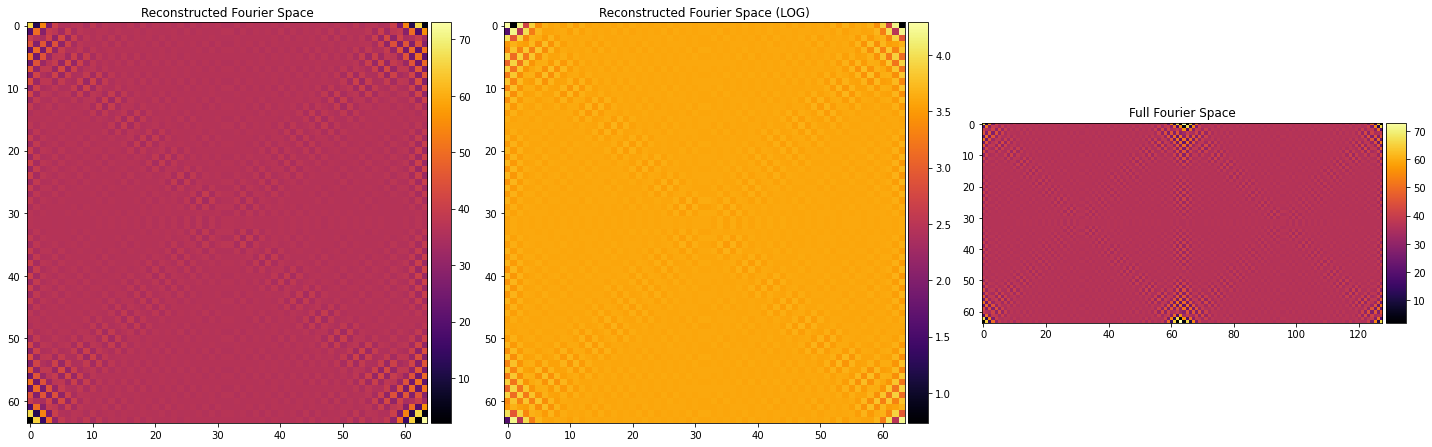

In [182]:
# plt.figure(figsize = (15,15), dpi = 100)
# fourier_space = np.zeros(shape=(128,64))

# for f_x in range(0,64):
#     for f_y in range(0,64):
#         projection = img*sin_cart(f_x,f_y, 0)
#         fourier_space[64+f_y,f_x] = np.sum(projection)
#         fourier_space[64-f_y,f_x] = np.sum(projection)
size = 64
fourier_space = np.zeros(shape=(size,size))
int_size = int(size//2)
for f_x in range(-int_size,int_size):
    for f_y in range(-int_size,int_size):
        projection = img*sin_cart(f_x,f_y, 0)
        fourier_space[f_y,f_x] += np.sum(projection)
        
cmap = 'inferno'

fig = plt.figure(figsize=(20,60))
ax1 = fig.add_subplot(131)
im1 = ax1.imshow(np.flip(fourier_space), cmap = cmap)
plt.title('Reconstructed Fourier Space')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(132)
im2 = ax2.imshow(np.log(fourier_space), cmap = cmap)
plt.title('Reconstructed Fourier Space (LOG)')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')


ax3 = fig.add_subplot(133)
full_fourier_space = np.concatenate((np.flip(fourier_space), fourier_space), axis = 1)
im3 = ax3.imshow(full_fourier_space, cmap = cmap)
plt.title('Full Fourier Space')
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

plt.tight_layout()

## Total response of the detector $S_n(f_x, f_y)$

In [79]:
# #symmetric reconstruction

# def S(phi):
#     fourier_space = np.zeros(shape=(128,64))
#     for f_x in range(0,64):
#         for f_y in range(0,64):
# #             projection = img*sin_cart(f_x,f_y, phi)
#             fourier_space[64+f_y,f_x] = np.sum(img*sin_cart(f_x,f_y, phi))
#             fourier_space[64-f_y,f_x] = np.sum(img*sin_cart(f_x,-f_y, phi))
#             fourier_space[0,f_x] = np.sum(img*sin_cart(64,-f_y, phi))

#     full_fourier_space = np.concatenate((np.flip(fourier_space, 1), fourier_space), axis = 1)
#     return full_fourier_space

In [183]:
#full spectrum reconstruction

def S(phi):
    fourier_space = np.zeros(shape=(size,size))
    for f_x in range(0,int_size):
        for f_y in range(0,int_size):
            fourier_space[int_size+f_y,int_size+f_x] = np.sum(img*sin_cart(f_x,f_y, phi))
            fourier_space[int_size-f_y,int_size+f_x] = np.sum(img*sin_cart(f_x,-f_y, phi))
            fourier_space[int_size+f_y,int_size-f_x] = np.sum(img*sin_cart(f_x,f_y, phi))
            fourier_space[int_size-f_y,int_size-f_x] = np.sum(img*sin_cart(-f_x,-f_y, phi))

    return fourier_space

In [81]:
#full spectrum reconstruction

def S(phi):
    fourier_space = np.zeros(shape=(128,128))
    for f_x in tqdm(range(0,64)):
        for f_y in range(0,64):
            fourier_space[64+f_y,64+f_x] += np.sum(img*sin_cart(f_x,f_y, phi))
            fourier_space[63-f_y,64+f_x] += np.sum(img*sin_cart(f_x,-f_y, phi))
            fourier_space[64+f_y,63-f_x] += np.sum(img*sin_cart(f_x,f_y, phi))
            fourier_space[63-f_y,63-f_x] += np.sum(img*sin_cart(-f_x,-f_y, phi))

    return fourier_space

In [191]:
#single loop spectrum reconstruction

def S(phi):
    fourier_space = np.zeros(shape=(size,size))
    for f_x in tqdm(range(-(int_size-1),int_size+1)):
        for f_y in range(-(int_size-1),int_size+1):
            fourier_space[f_y,f_x] += np.sum(img*sin_cart(f_x,f_y, phi))

    return fftshift(fourier_space)

In [24]:
# def S(phi):
#     fourier_space = np.zeros(shape=(128,128))
#     for f_x in tqdm(range(64), desc='Processing'):
#         for f_y in range(64):
#             fourier_space[f_x,f_y] = np.sum(img*sin_cart(f_x,f_y, phi))
#             fourier_space[-f_x,-f_y] = np.sum(img*sin_cart(-f_x,-f_y, phi))
#             fourier_space[-f_x,f_y] = np.sum(img*sin_cart(-f_x,f_y, phi))
#             fourier_space[f_x,-f_y] = np.sum(img*sin_cart(f_x,-f_y, phi))

#     return fftshift(fourier_space)

In [192]:
S_0 = S(0)
S_1 = S(2*np.pi//3)
S_2 = S(4*np.pi//3)

100%|██████████████████████████████████████████| 64/64 [00:00<00:00, 182.04it/s]


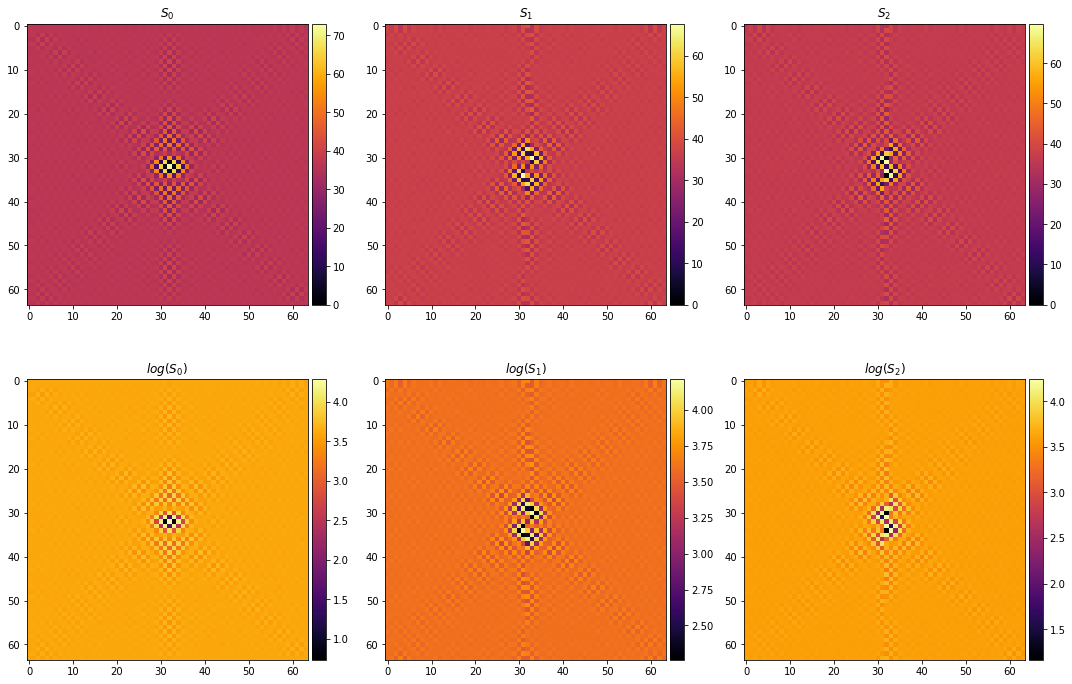

In [193]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(231)
im1 = ax1.imshow(S_0, cmap = cmap, vmin = 0)
plt.title('$S_0$')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(232)
im2 = ax2.imshow(S_1, cmap = cmap, vmin = 0)
plt.title('$S_1$')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(233)
im3 = ax3.imshow(S_2, cmap = cmap, vmin = 0)
plt.title('$S_2$')
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

ax4 = fig.add_subplot(234)
im4 = ax4.imshow(np.log(S_0), cmap = cmap)
plt.title('$log(S_0)$')
divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im4, cax=cax, orientation='vertical')

ax5 = fig.add_subplot(235)
im5 = ax5.imshow(np.log(S_1), cmap = cmap)
plt.title('$log(S_1)$')
divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im5, cax=cax, orientation='vertical')

ax6 = fig.add_subplot(236)
im6 = ax6.imshow(np.log(S_2), cmap = cmap)
plt.title('$log(S_2)$')
divider = make_axes_locatable(ax6)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im6, cax=cax, orientation='vertical')

plt.tight_layout()

## Reflectivity in Fourier Space $\frac{1}{3}[2S_0 - S_1 - S_2] + \frac{\sqrt{3}}{3}j \cdot [S_2 - S_1]$

In [194]:
FT_real = (1/3)*(2*S_0 - S_1 - S_2)
FT_imaginary = (np.sqrt(3)/3)*(S_2-S_1)*1j
FT = FT_real + FT_imaginary

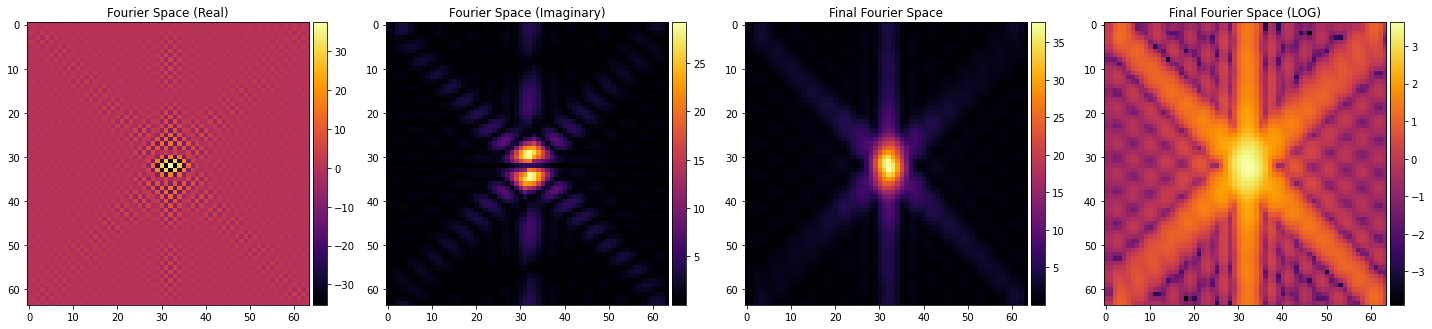

In [195]:
fig = plt.figure(figsize=(20,60))
ax1 = fig.add_subplot(141)
im1 = ax1.imshow(FT_real, cmap = cmap)
plt.title('Fourier Space (Real)')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')


ax2 = fig.add_subplot(142)
im2 = ax2.imshow(np.abs(FT_imaginary), cmap = cmap)
plt.title('Fourier Space (Imaginary)')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(143)
im3 = ax3.imshow(np.abs(FT), cmap = cmap)
plt.title('Final Fourier Space')
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

ax4 = fig.add_subplot(144)
im4 = ax4.imshow(np.log(np.abs(FT)), cmap = cmap)
plt.title('Final Fourier Space (LOG)')
divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im4, cax=cax, orientation='vertical')

plt.tight_layout()

## Total reflectivity of the object: $R(x,y)$ ~ $F^{-1}...]$

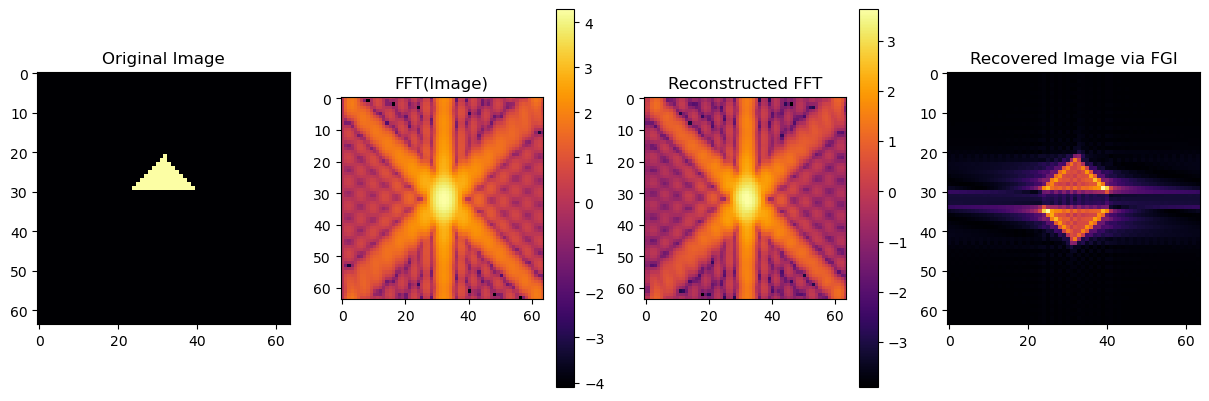

In [196]:
plt.figure(dpi = 100, figsize = (15,5))
plt.subplot(141)
plt.title("Original Image")
plt.imshow(img, cmap = cmap)

plt.subplot(142)
plt.title("FFT(Image)")
fft_img = fftshift(np.abs(fft2(img)))
plt.imshow(np.log(fft_img), cmap = cmap)
plt.colorbar()

plt.subplot(143)
plt.title("Reconstructed FFT")
plt.imshow(np.log(np.abs((FT))), cmap = cmap)
plt.colorbar()

plt.subplot(144)
image_reconstruction = np.abs(ifft2(FT))
plt.title("Recovered Image via FGI")
plt.imshow(image_reconstruction, cmap = cmap)
plt.show()

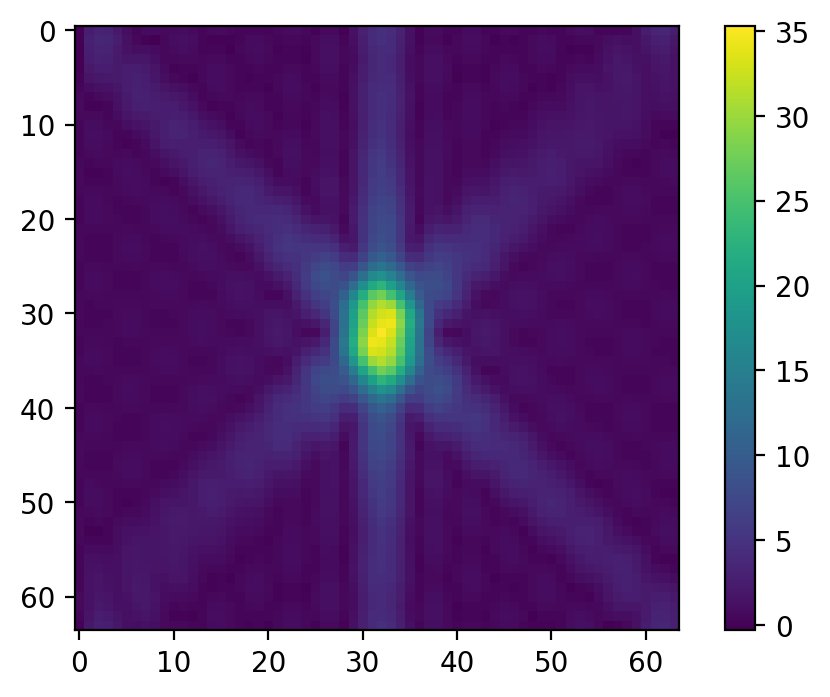

In [197]:
# diff = fft_img - FT

plt.figure(dpi = 200)
plt.imshow(np.abs(fft_img) - np.abs(FT))
plt.colorbar()

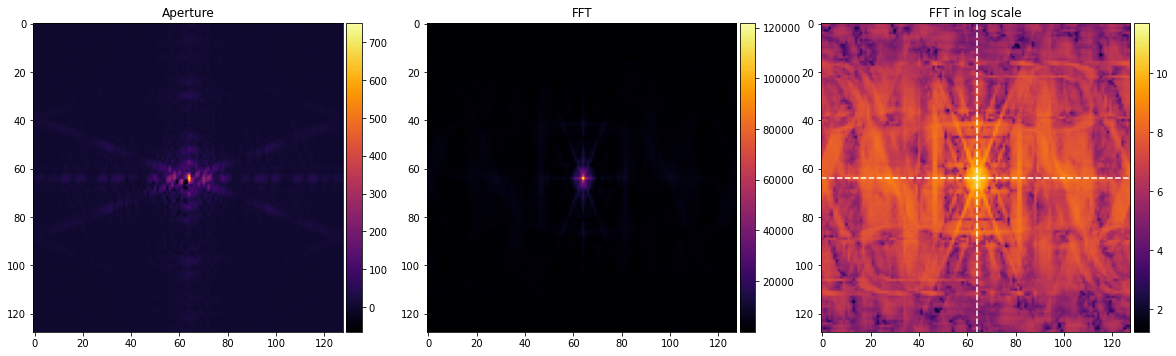

In [42]:
FFT(np.abs(fft_img) - np.abs(FT))

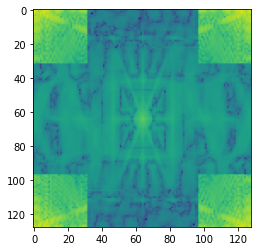

In [43]:
plt.imshow(np.log(fftshift(np.abs(ifft2(fft_img) - FT))))

In [31]:
def FGI(spectral_coverage):
    def S(phi):
        fourier_space = np.zeros(shape=(128,128))
        for f_x in range(0,int(spectral_coverage*64)):
#         for f_x in tqdm(range(0,int(spectral_coverage*64)+1), desc = 'Reconstructing: '):
            for f_y in range(0,int(spectral_coverage*64)):
                fourier_space[64+f_y,64+f_x] = np.sum(img*sin_cart(f_x,f_y, phi))
                fourier_space[64-f_y,64+f_x] = np.sum(img*sin_cart(f_x,-f_y, phi))
                fourier_space[64+f_y,64-f_x] = np.sum(img*sin_cart(f_x,f_y, phi))
                fourier_space[64-f_y,64-f_x] = np.sum(img*sin_cart(-f_x,-f_y, phi))

        return fourier_space

    S_0 = S(0)
    S_1 = S(2*np.pi//3)
    S_2 = S(4*np.pi//3)

    FT_real = (1/3)*(2*S_0 - S_1 - S_2)
    FT_imaginary = (np.sqrt(3)/3)*(S_2-S_1)*1j
    FT = FT_real + FT_imaginary

    
    return FT

#     fft_img = fftshift(np.abs(fft2(img)))

#     plt.figure(dpi = 150, figsize = (15,5))
#     plt.subplot(141)
#     plt.title("Original Image")
#     plt.imshow(img, cmap = cmap)

#     plt.subplot(142)
#     plt.title("FFT(Image)")
#     fft_img = fftshift(np.abs(fft2(img)))
#     plt.imshow(np.log(fft_img), cmap = cmap)

#     plt.subplot(143)
#     plt.title("Fourier Spectrum (" + str(int(spectral_coverage*100)) + "%)")
#     plt.imshow(np.log(np.abs(FT)), cmap = cmap)

#     plt.subplot(144)
#     image_reconstruction = np.abs(fft2(FT))
#     plt.title("Recovered Image via FGI")
#     plt.imshow(image_reconstruction, cmap = cmap)
#     plt.show()

In [158]:
img = triangle(5)

In [198]:
        
def sin_cart(f_x, f_y, phi): #with phase shift `phi`
    x = np.linspace(0,np.pi, 64)
    X,Y = np.meshgrid(x,x)
    r = np.sqrt(f_x**2 + f_y**2) #frequency 
    if f_x == 0: theta = np.pi/2 #avoid zero error for `arctan`
    else: theta = np.arctan(f_y/f_x)
    Z = np.cos(2*r*(Y*np.sin(theta)+X*np.cos(theta)) + phi)
    Z = (Z+1)/2 #shift values sinusoid range from [-1,1] to [0,1]
    return Z #return a sinusoid image

def FGI(spectral_coverage):
    
    def S(phi):
        fourier_space = np.zeros(shape=(len(img),len(img)))
        n = int(32*spectral_coverage)
        for f_x in tqdm(range(-(n-1),n+1)):
            for f_y in range(-(n-1),n+1):
                fourier_space[f_y,f_x] += np.sum(img*sin_cart(f_x,f_y, phi))

        return fftshift(fourier_space)
    

    S_0 = S(0)
    S_1 = S(2*np.pi//3)
    S_2 = S(4*np.pi//3)

    FT_real = (1/3)*(2*S_0 - S_1 - S_2)
    FT_imaginary = (np.sqrt(3)/3)*(S_2-S_1)*1j
    FT = FT_real + FT_imaginary
    
    return FT

100%|██████████████████████████████████████████| 64/64 [00:00<00:00, 185.54it/s]


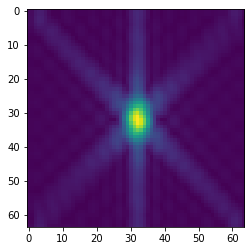

In [199]:
plt.imshow(abs(FGI(spectral_coverage = 1)))

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 692.34it/s]

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 908.51it/s]

100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1001.86it/s]
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/1665111598.py:13: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(FT)), cmap = cmap)

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 797.45it/s]

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 848.95it/s]

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 610.56it/s]

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 624.68it/s]

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 610.35it/s]

100%|██████████████████████████████████████████| 24/24 [00:00<00:00, 480.27it/s]

100%|██████████████████████████████████████████| 24/24 [00:00<00:00, 476.20it/s]

10

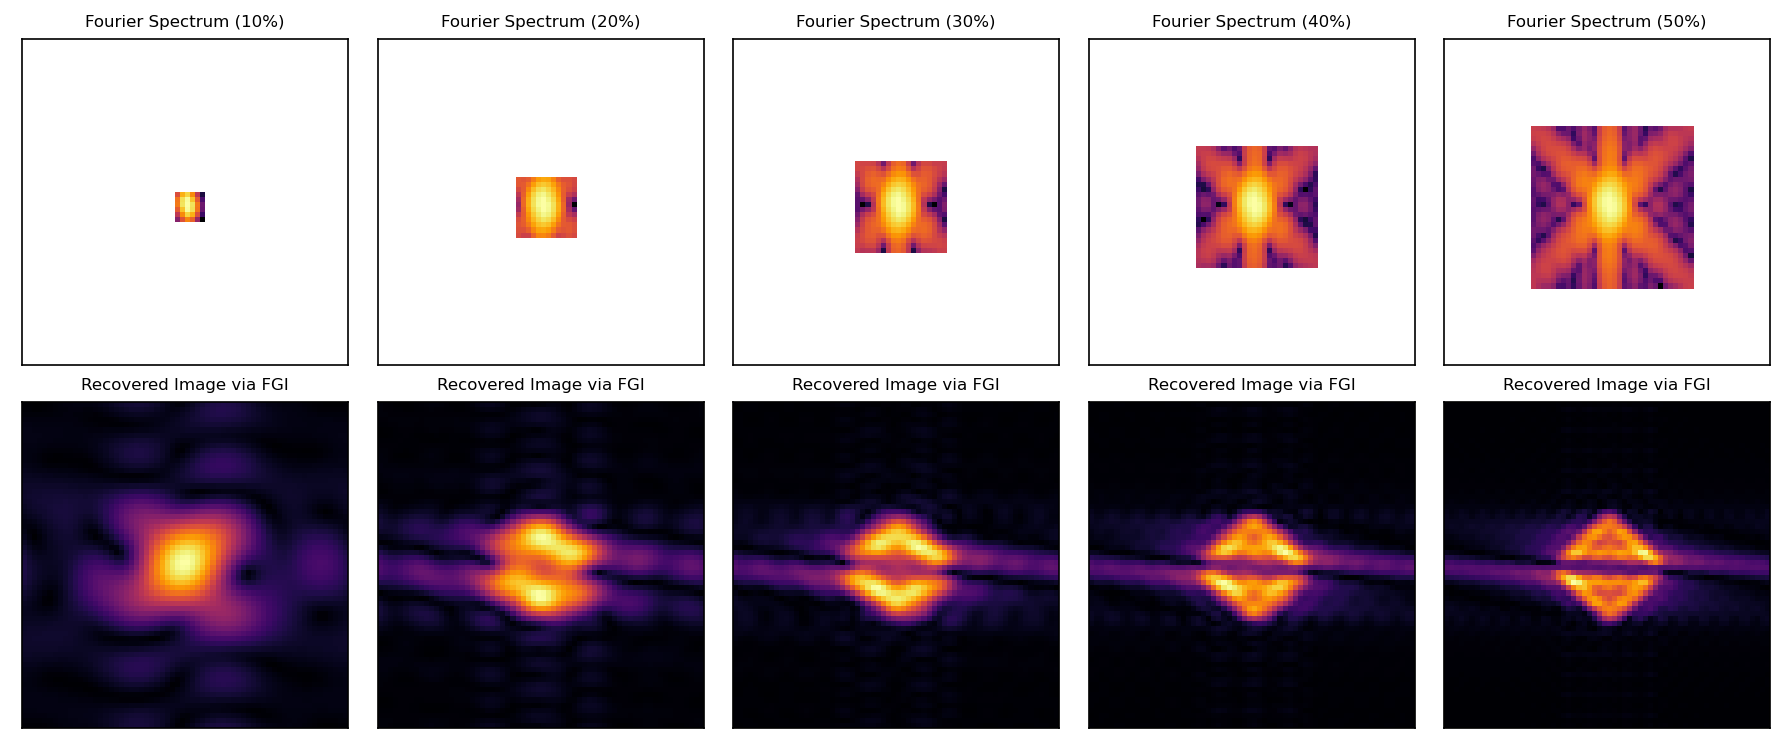

In [200]:
plt.figure(figsize = (12,5), dpi = 150)
img = triangle(10)

for i in tqdm(range(1,6), "Processing: "):
    
    FT = FGI(spectral_coverage = 0.10*i)

    
#     FT = FGI(spectral_coverage = 0.10*i)
    
    plt.subplot(2,5,i)
    plt.title("Fourier Spectrum (" + str(int(0.10*i*100)) + "%)", fontsize = 8)
    plt.imshow(np.log(np.abs(FT)), cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(2,5,i+5)
    image_reconstruction = np.abs(fft2(FT))
    plt.title("Recovered Image via FGI", fontsize = 8)
    plt.imshow(image_reconstruction, cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
# plt.savefig('Reconstruction1.png')
plt.show()

100%|██████████████████████████████████████████| 38/38 [00:00<00:00, 266.72it/s]

100%|██████████████████████████████████████████| 38/38 [00:00<00:00, 304.21it/s]

100%|██████████████████████████████████████████| 38/38 [00:00<00:00, 300.11it/s]
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/1439323692.py:13: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(FT)), cmap = cmap)
100%|██████████████████████████████████████████| 44/44 [00:00<00:00, 263.46it/s]

100%|██████████████████████████████████████████| 44/44 [00:00<00:00, 262.53it/s]

100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 218.55it/s]

100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 215.80it/s]

100%|██████████████████████████████████████████| 56/56 [00:00<00:00, 193.30it/s]

100%|██████████████████████████████████████████| 56/56 [00:00<00:00, 193.51it/s]

100%|██████████████████████████████████████████| 64/64 [00:00<00:00, 170.56it/s]

100

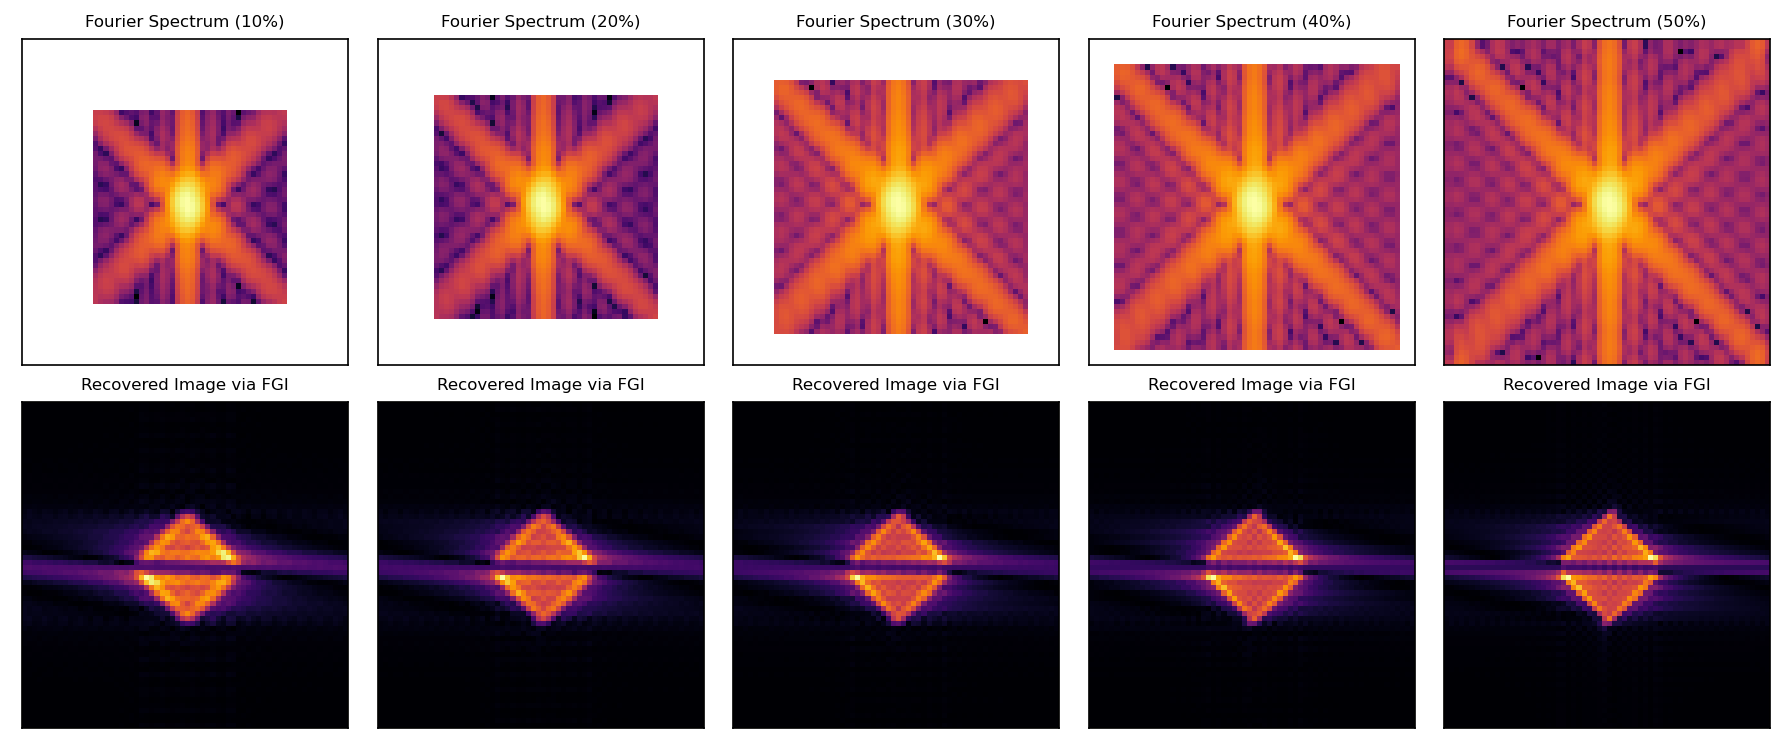

In [201]:
plt.figure(figsize = (12,5), dpi = 150)
img = triangle(10)

for i in tqdm(range(1,6), "Processing: "):
    
    FT = FGI(spectral_coverage = 0.5+0.10*i)

    
#     FT = FGI(spectral_coverage = 0.10*i)
    
    plt.subplot(2,5,i)
    plt.title("Fourier Spectrum (" + str(int(0.10*i*100)) + "%)", fontsize = 8)
    plt.imshow(np.log(np.abs(FT)), cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(2,5,i+5)
    image_reconstruction = np.abs(fft2(FT))
    plt.title("Recovered Image via FGI", fontsize = 8)
    plt.imshow(image_reconstruction, cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
# plt.savefig('Reconstruction1.png')
plt.show()

In [ ]:
plt.figure(figsize = (12,5), dpi = 150)

for i in tqdm(range(1,6), "Processing: "):
    
    FT = FGI(spectral_coverage = 0.10*i)
    
    plt.subplot(2,5,i)
    plt.title("Fourier Spectrum (" + str(int(0.10*i*100)) + "%)", fontsize = 8)
    plt.imshow(np.log(np.abs(FT)), cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(2,5,i+5)
    image_reconstruction = np.abs(fft2(FT))
    plt.title("Recovered Image via FGI", fontsize = 8)
    plt.imshow(image_reconstruction, cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
# plt.savefig('Reconstruction1.png')
plt.show()

Processing:   0%|                                         | 0/5 [00:00<?, ?it/s]/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/911321535.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(FT)), cmap = cmap)
Processing: 100%|█████████████████████████████████| 5/5 [00:33<00:00,  6.64s/it]


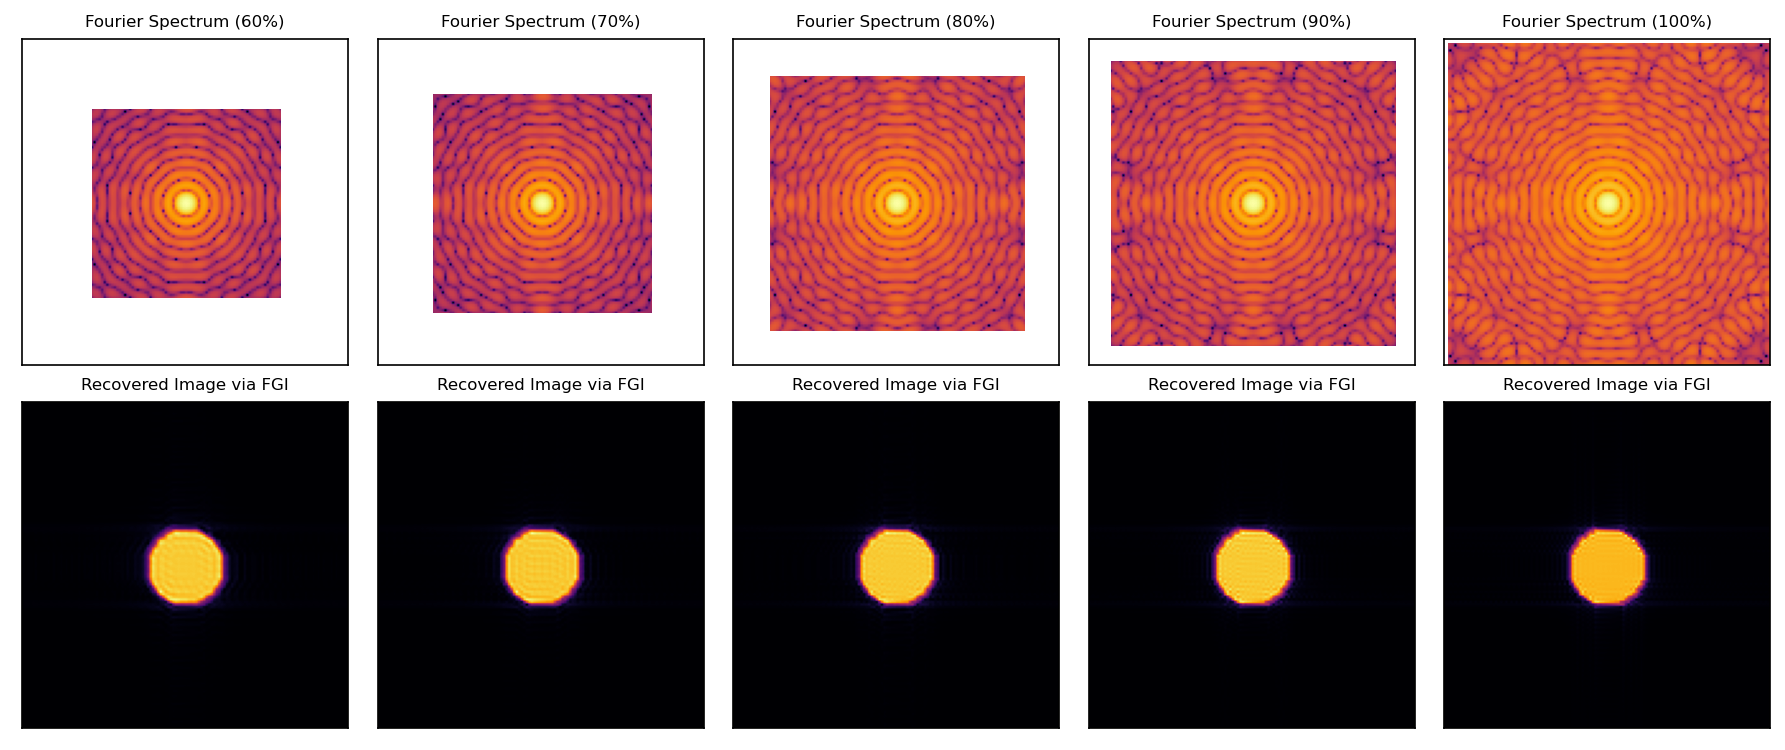

In [75]:
plt.figure(figsize = (12,5), dpi = 150)

for i in tqdm(range(1,6), "Processing: "):
    
    FT = FGI(spectral_coverage = 0.50+(0.10*i))
    
    plt.subplot(2,5,i)
    plt.title("Fourier Spectrum (" + str(int((.50+(0.10*i))*100)) + "%)", fontsize = 8)
    plt.imshow(np.log(np.abs(FT)), cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(2,5,i+5)
    image_reconstruction = np.abs(fft2(FT))
    plt.title("Recovered Image via FGI", fontsize = 8)
    plt.imshow(image_reconstruction, cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
# plt.savefig('Reconstruction2.png')
plt.show()

## FGI: Synthetic Images

In [115]:
def Circ(r): #circle
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x, y = disk(center, r)
    aperture[x, y] = 1
    return aperture

In [95]:
L = 64
def Rec(w,h): #rectangle
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    for i in np.arange(center[0]-w//2,center[0]+w//2): #width
        for j in np.arange(center[1]-h//2,center[1]+h//2) : #height
            aperture[int(i)][int(j)] = 1
    return aperture

def Slit(d,h,w): #doubleslit
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x = (center[0]-d/2,center[0]+d/2)
    for i1 in np.arange(x[0]-w,x[0]):
        for i2 in np.arange(x[1], x[1]+w):
            for j in np.arange(center[1]-h//2,center[1]+h//2):
                aperture[int(j)][int(i1)] = 1
                aperture[int(j)][int(i2)] = 1
    return aperture

# def Gaussian(sigma):
# #     aperture = np.zeros(shape = (L,L), dtype = float)
# #     center = (L/2,L/2)
# #     for i in np.arange(center[0]-L//2,center[0]+L//2):
# #         for j in np.arange(center[1]-L//2,center[1]+L//2):
# #             aperture[int(i)][int(j)] += np.abs(np.exp(-((i-L/2)*(i-L/2)+(j-L/2)*(j-L/2))
# # return aperture

In [144]:
L = 64
def triangle(height):
    aperture = np.zeros(shape = (L,L), dtype = float)
    tip = (int(L/3),int(L/2))
#     height = 20
    for i in np.arange(0, height):
        aperture[tip[0], tip[1]] = 1
        aperture[tip[0]+i, tip[1]-i:tip[1]+i] = 1
    return aperture
                


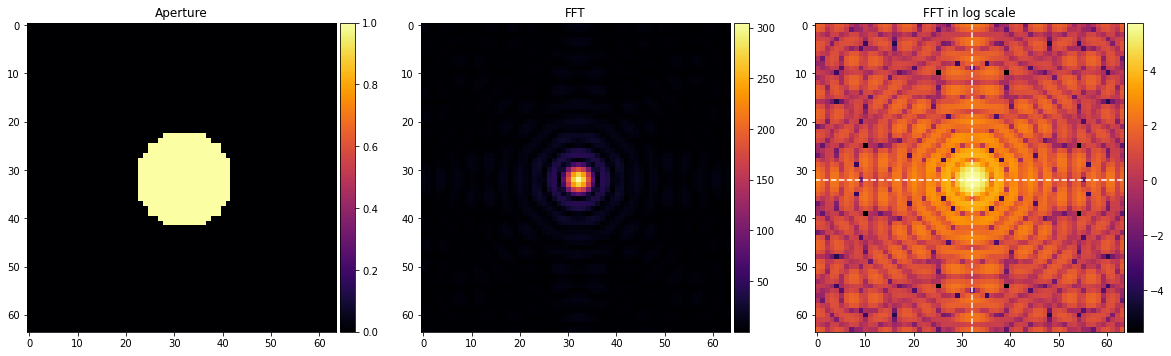

In [155]:
FFT(Circ(10))

/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/2564310062.py:23: RuntimeWarning: divide by zero encountered in log
  im3 = ax3.imshow(np.log(FT_aperture), cmap = cmap)


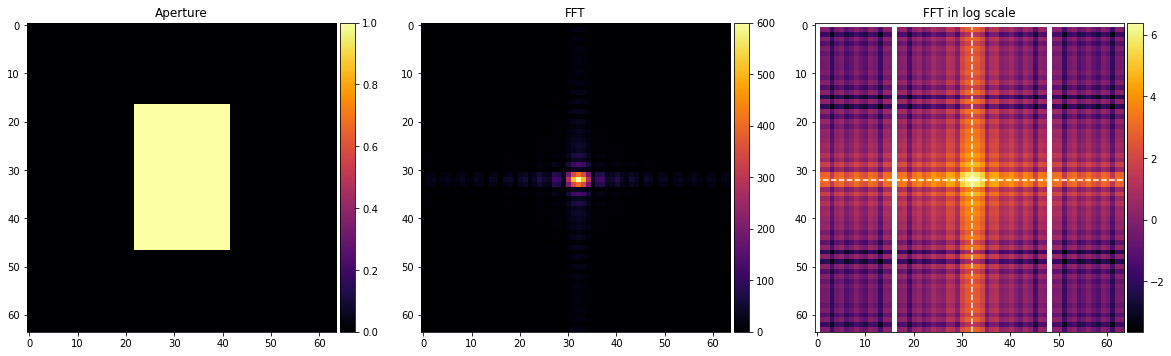

In [96]:
FFT(Rec(30,20))

/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/2564310062.py:23: RuntimeWarning: divide by zero encountered in log
  im3 = ax3.imshow(np.log(FT_aperture), cmap = cmap)


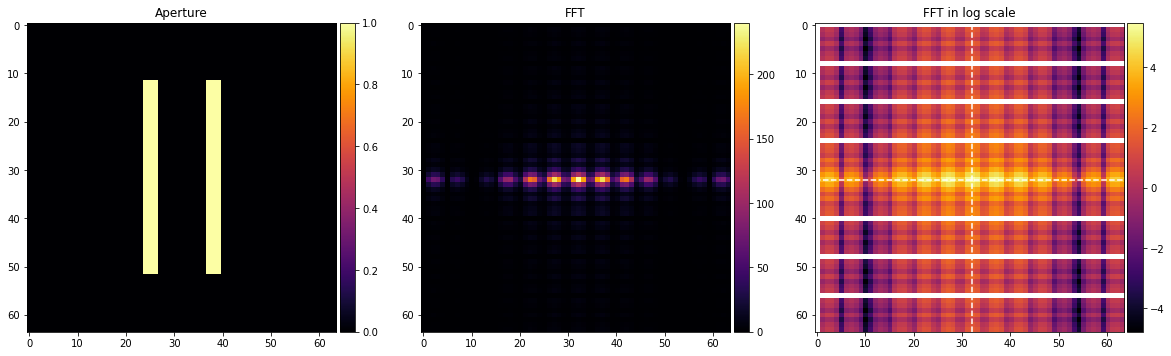

In [97]:
FFT(Slit(10, 40, 3))

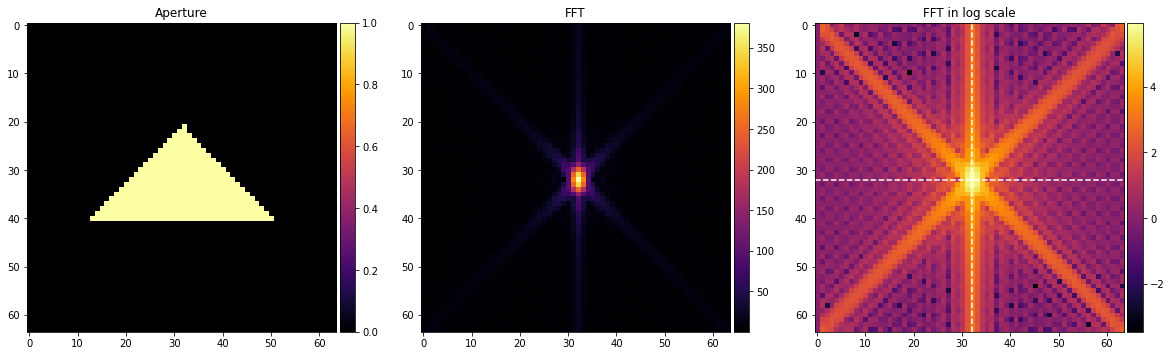

In [145]:
FFT(triangle(20))

In [146]:

def FGI_aperture(img):
    
    def sin_cart(f_x, f_y, phi): #with phase shift `phi`
        x = np.linspace(0,np.pi, 64)
        X,Y = np.meshgrid(x,x)
        r = np.sqrt(f_x**2 + f_y**2) #frequency 
        if f_x == 0: theta = np.pi/2 #avoid zero error for `arctan`
        else: theta = np.arctan(f_y/f_x)
        Z = np.cos(2*r*(Y*np.sin(theta)+X*np.cos(theta)) + phi)
        Z = (Z+1)/2 #shift values sinusoid range from [-1,1] to [0,1]
        return Z #return a sinusoid image
    
    def S(phi):
        fourier_space = np.zeros(shape=(len(img),len(img)))
        for f_x in tqdm(range(-31,33)):
            for f_y in range(-31,33):
                fourier_space[f_y,f_x] += np.sum(img*sin_cart(f_x,f_y, phi))

        return fftshift(fourier_space)
    
    
    S_0 = S(0)
    S_1 = S(2*np.pi//3)
    S_2 = S(4*np.pi//3)

    FT_real = (1/3)*(2*S_0 - S_1 - S_2)
    FT_imaginary = (np.sqrt(3)/3)*(S_2-S_1)*1j
    FT = FT_real + FT_imaginary
    
    plt.figure(dpi = 100, figsize = (15,5))
    plt.subplot(141)
    plt.title("Original Image")
    plt.imshow(img, cmap = cmap)

    plt.subplot(142)
    plt.title("FFT(Image)")
    fft_img = fftshift(np.abs(fft2(img)))
    plt.imshow(np.log(fft_img), cmap = cmap)
    plt.colorbar()

    plt.subplot(143)
    plt.title("Reconstructed FFT")
    plt.imshow(np.log(np.abs((FT))), cmap = cmap)
    plt.colorbar()

    plt.subplot(144)
    image_reconstruction = np.abs(ifft2(FT))
    plt.title("Recovered Image via FGI")
    plt.imshow(image_reconstruction, cmap = cmap)
    plt.show()


100%|██████████████████████████████████████████| 64/64 [00:00<00:00, 188.73it/s]
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/500688311.py:38: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(fft_img), cmap = cmap)
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/500688311.py:43: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs((FT))), cmap = cmap)


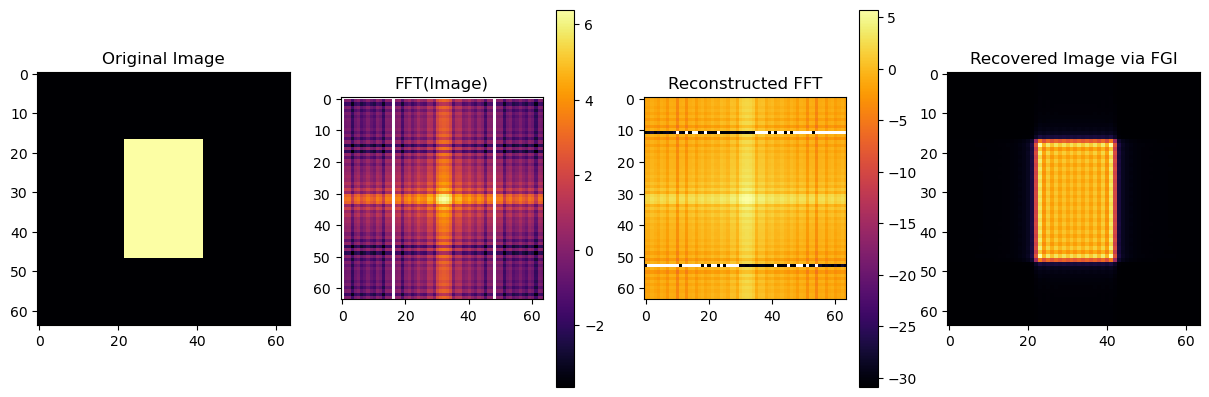

In [109]:
FGI_aperture(Rec(30,20))

100%|██████████████████████████████████████████| 64/64 [00:00<00:00, 182.53it/s]
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/500688311.py:38: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(fft_img), cmap = cmap)


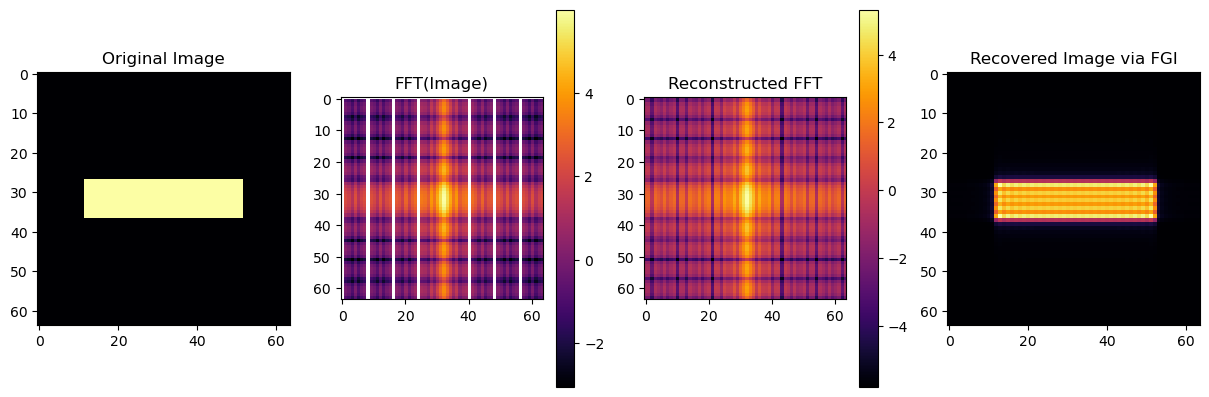

In [110]:
FGI_aperture(Rec(10,40))

100%|██████████████████████████████████████████| 64/64 [00:00<00:00, 188.13it/s]
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/500688311.py:38: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(fft_img), cmap = cmap)
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/500688311.py:43: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs((FT))), cmap = cmap)


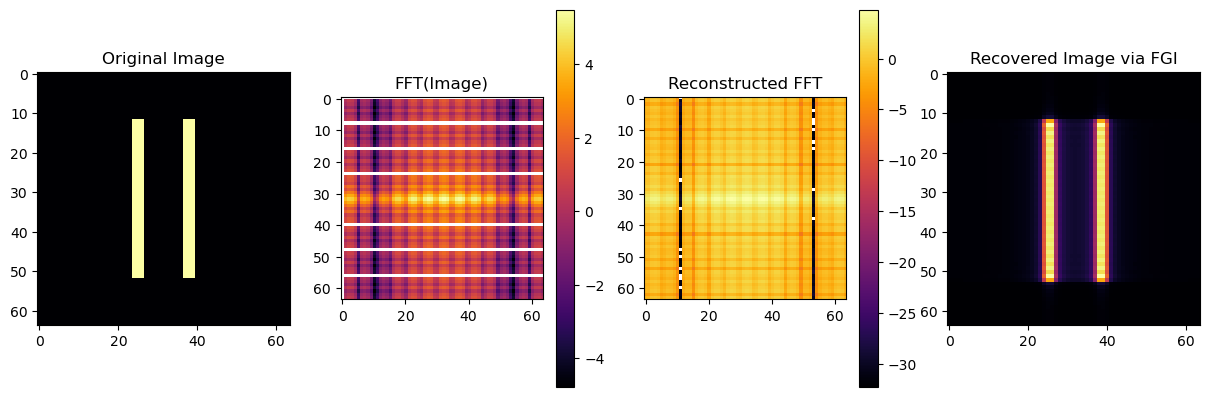

In [111]:
FGI_aperture(Slit(10, 40, 3))

100%|██████████████████████████████████████████| 64/64 [00:00<00:00, 185.62it/s]
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/500688311.py:38: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(fft_img), cmap = cmap)
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/500688311.py:43: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs((FT))), cmap = cmap)


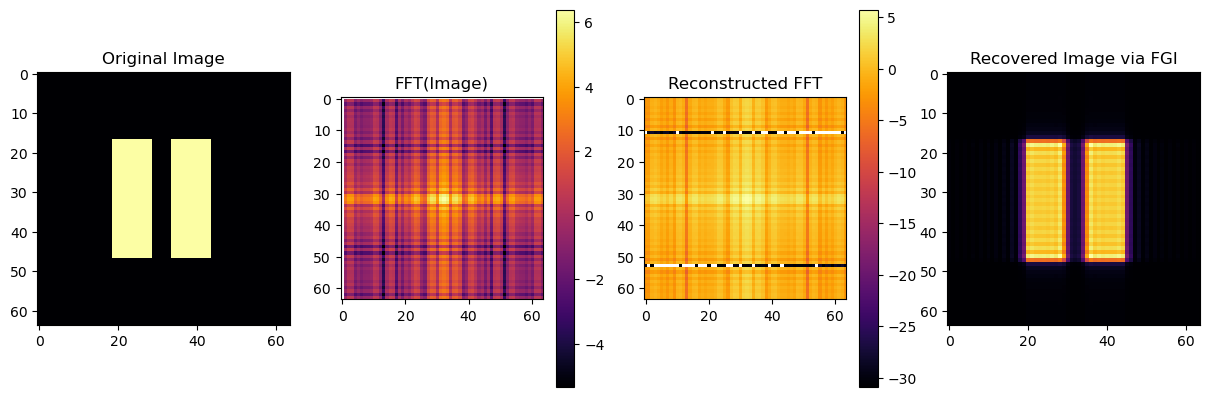

In [112]:
FGI_aperture(Slit(5, 30, 10))

100%|██████████████████████████████████████████| 64/64 [00:00<00:00, 184.28it/s]


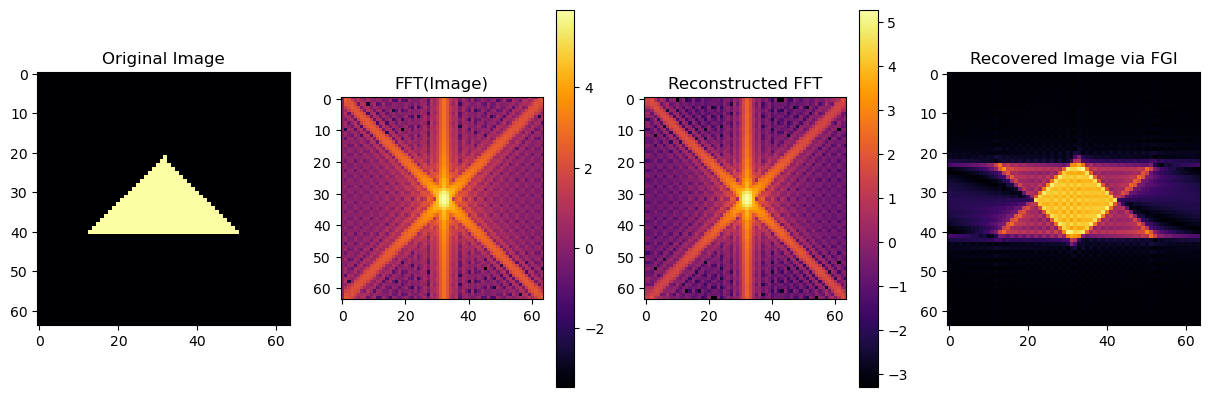

In [147]:
FGI_aperture(triangle(20))

In [148]:

def FGI_(img):
    
    def sin_cart(f_x, f_y, phi): #with phase shift `phi`
        x = np.linspace(0,np.pi, 64)
        X,Y = np.meshgrid(x,x)
        r = np.sqrt(f_x**2 + f_y**2) #frequency 
        if f_x == 0: theta = np.pi/2 #avoid zero error for `arctan`
        else: theta = np.arctan(f_y/f_x)
        Z = np.cos(2*r*(Y*np.sin(theta)+X*np.cos(theta)) + phi)
        Z = (Z+1)/2 #shift values sinusoid range from [-1,1] to [0,1]
        return Z #return a sinusoid image
    
    def S(phi):
        fourier_space = np.zeros(shape=(len(img),len(img)))
        for f_x in range(-31,33):
            for f_y in range(-31,33):
                fourier_space[f_y,f_x] += np.sum(img*sin_cart(f_x,f_y, phi))

        return fftshift(fourier_space)
    
    
    S_0 = S(0)
    S_1 = S(2*np.pi//3)
    S_2 = S(4*np.pi//3)

    FT_real = (1/3)*(2*S_0 - S_1 - S_2)
    FT_imaginary = (np.sqrt(3)/3)*(S_2-S_1)*1j
    FT = FT_real + FT_imaginary
    
    return FT

Processing: 100%|█████████████████████████████████| 8/8 [00:08<00:00,  1.04s/it]


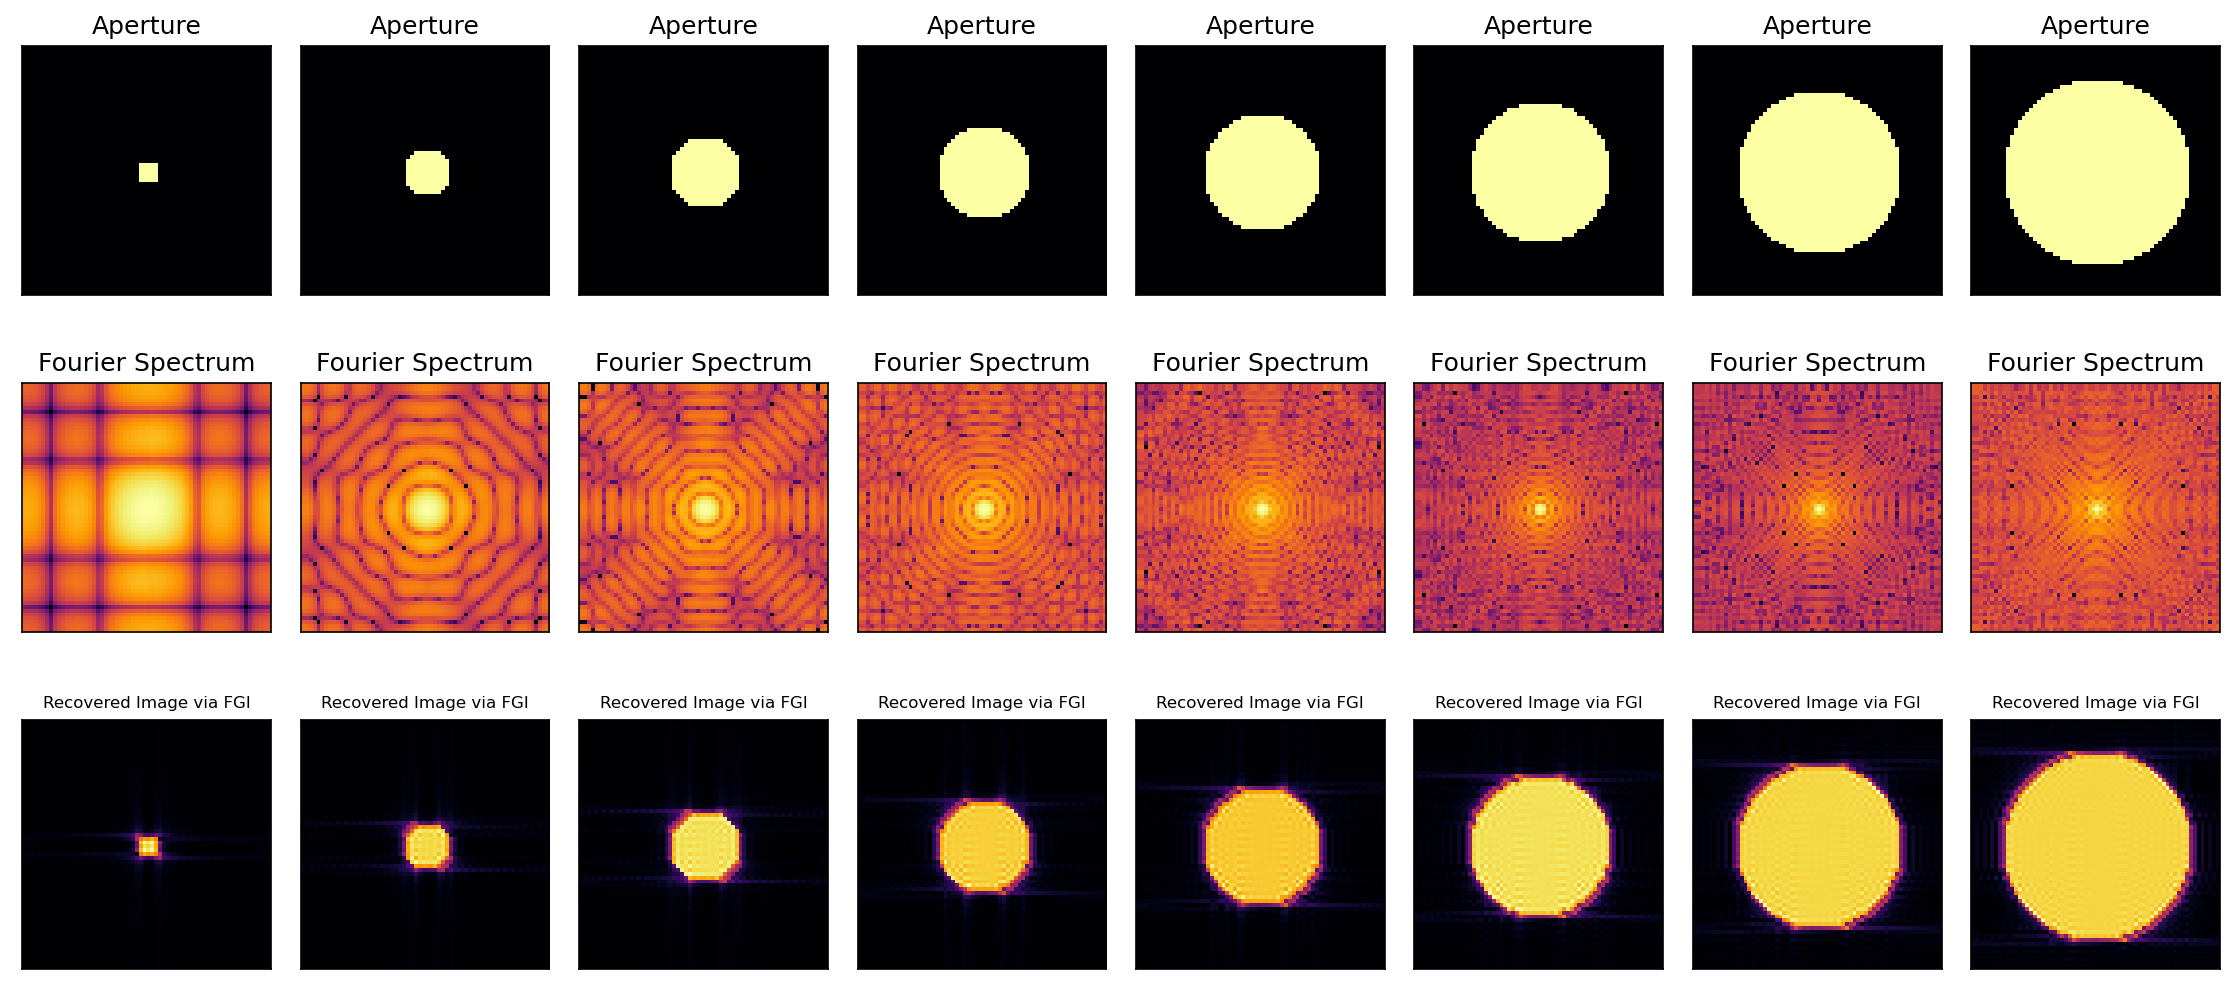

In [149]:
plt.figure(figsize = (15,7), dpi = 150)

for i in tqdm(range(1,9), "Processing: "):
    
    img = Circ(3*i)

    FT = FGI_(img)
    
    plt.subplot(3,8,i)
    plt.title("Aperture")
    plt.imshow(img, cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,8,i+8)
    plt.title("Fourier Spectrum")
    plt.imshow(np.log(np.abs(FT)), cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,8,i+16)
    image_reconstruction = np.abs(fft2(FT))
    plt.title("Recovered Image via FGI", fontsize = 8)
    plt.imshow(image_reconstruction, cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

Processing:   0%|                                         | 0/8 [00:00<?, ?it/s]/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/1073710284.py:17: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(FT)), cmap = cmap)
Processing: 100%|█████████████████████████████████| 8/8 [00:08<00:00,  1.04s/it]


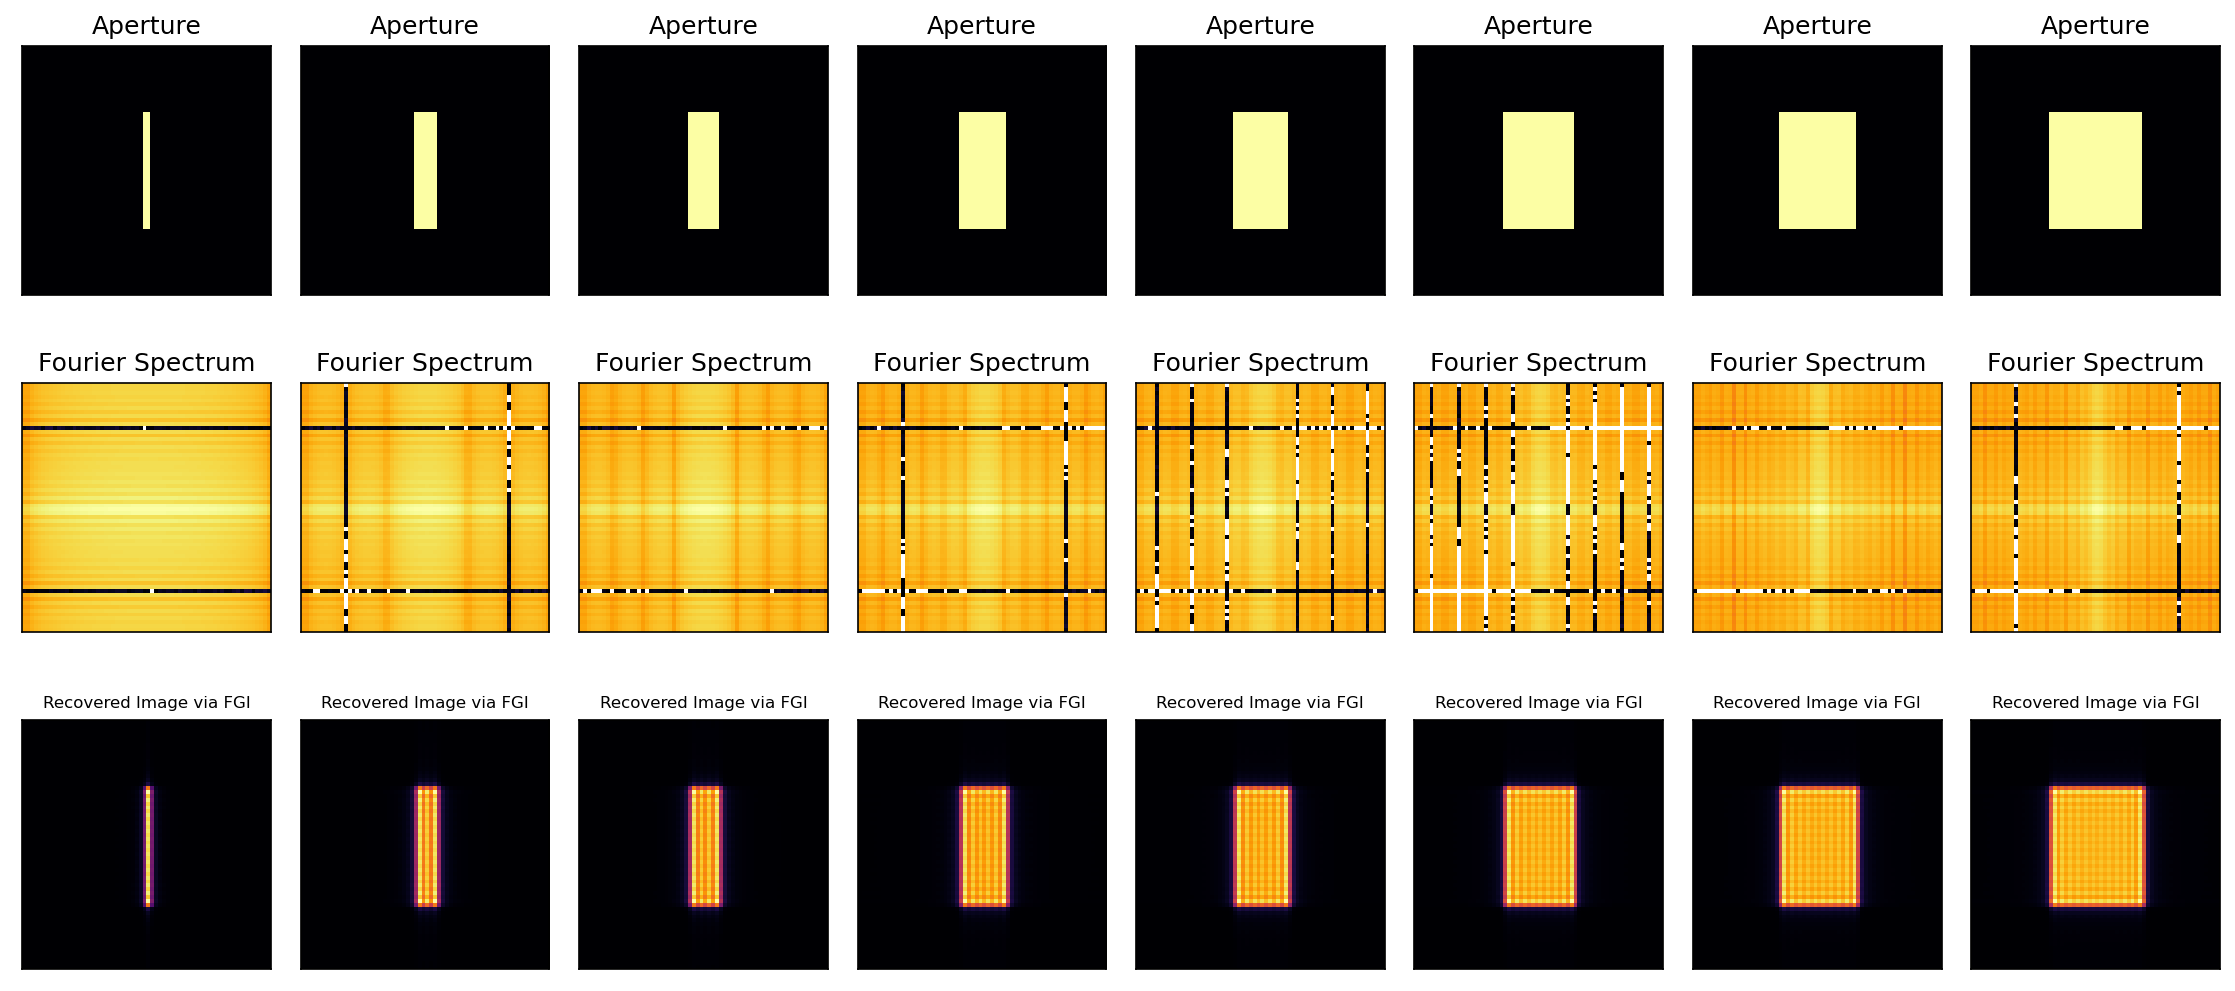

In [129]:
plt.figure(figsize = (15,7), dpi = 150)

for i in tqdm(range(1,9), "Processing: "):
    
    img = Rec(30, 3*i)

    FT = FGI_(img)
    
    plt.subplot(3,8,i)
    plt.title("Aperture")
    plt.imshow(img, cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,8,i+8)
    plt.title("Fourier Spectrum")
    plt.imshow(np.log(np.abs(FT)), cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,8,i+16)
    image_reconstruction = np.abs(fft2(FT))
    plt.title("Recovered Image via FGI", fontsize = 8)
    plt.imshow(image_reconstruction, cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

Processing:  12%|████▏                            | 1/8 [00:01<00:07,  1.04s/it]/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_1078/1502643696.py:17: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(FT)), cmap = cmap)
Processing: 100%|█████████████████████████████████| 8/8 [00:08<00:00,  1.06s/it]


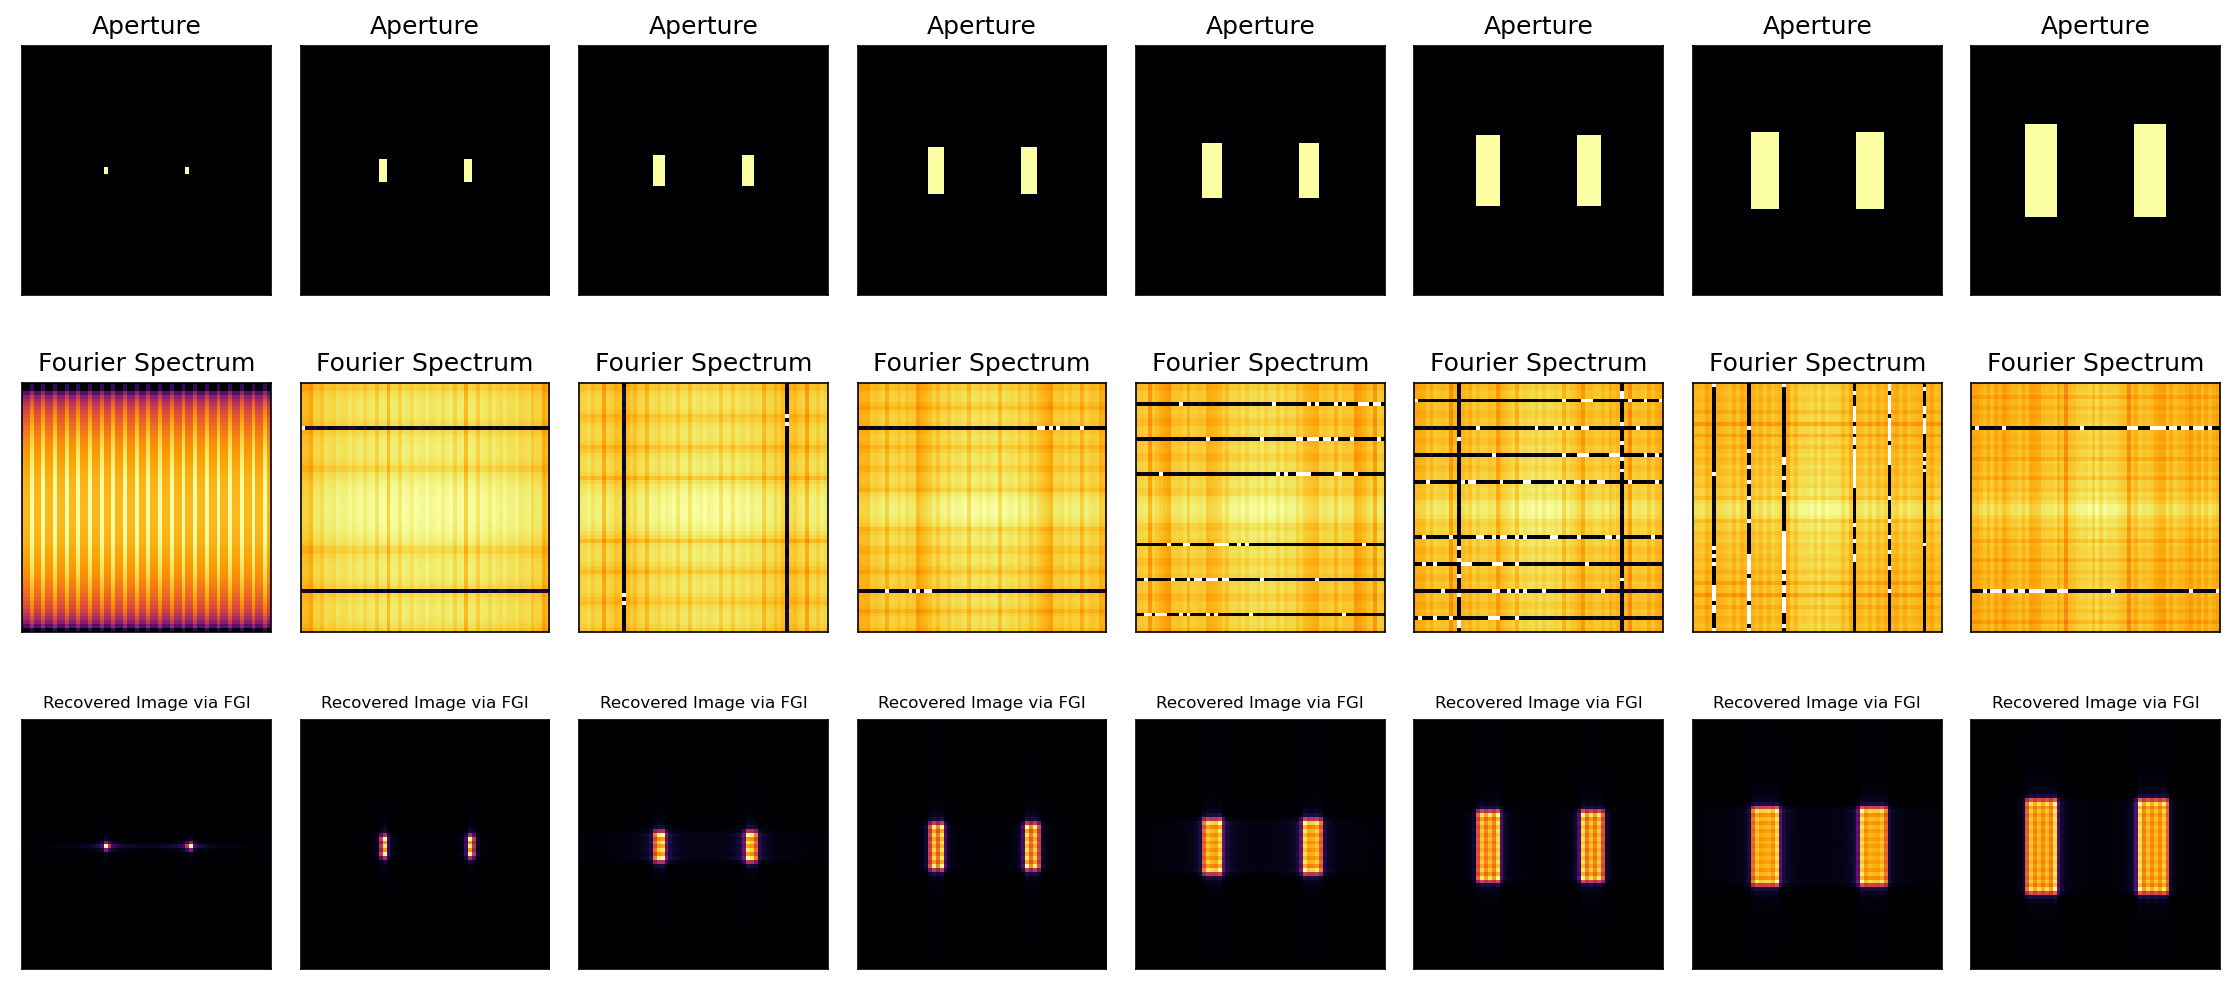

In [131]:
plt.figure(figsize = (15,7), dpi = 150)

for i in tqdm(range(1,9), "Processing: "):
    
    img = Slit(10, 3*i, 1*i)

    FT = FGI_(img)
    
    plt.subplot(3,8,i)
    plt.title("Aperture")
    plt.imshow(img, cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,8,i+8)
    plt.title("Fourier Spectrum")
    plt.imshow(np.log(np.abs(FT)), cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,8,i+16)
    image_reconstruction = np.abs(fft2(FT))
    plt.title("Recovered Image via FGI", fontsize = 8)
    plt.imshow(image_reconstruction, cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

Processing: 100%|█████████████████████████████████| 8/8 [00:08<00:00,  1.03s/it]


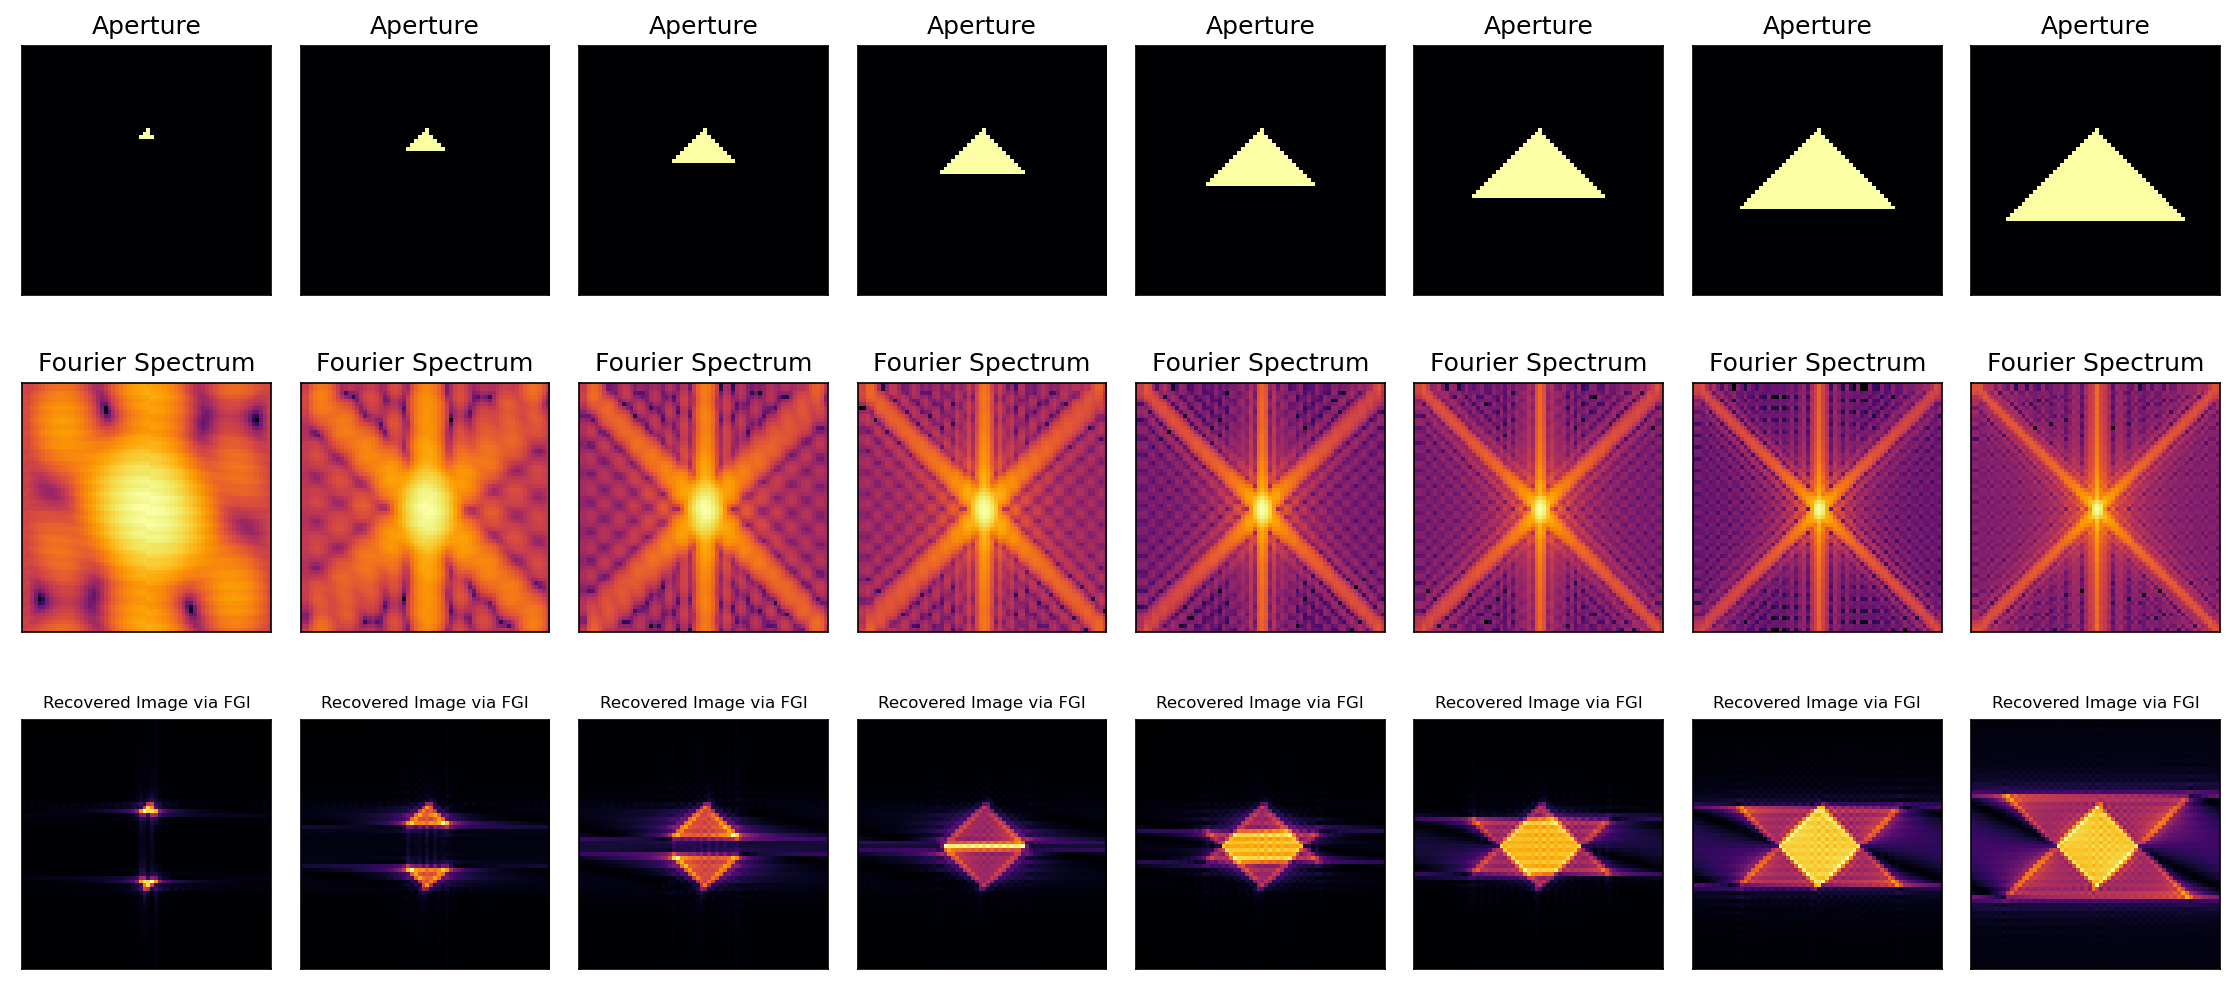

In [151]:
plt.figure(figsize = (15,7), dpi = 150)

for i in tqdm(range(1,9), "Processing: "):
    
    img = triangle(3*i)

    FT = FGI_(img)
    
    plt.subplot(3,8,i)
    plt.title("Aperture")
    plt.imshow(img, cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,8,i+8)
    plt.title("Fourier Spectrum")
    plt.imshow(np.log(np.abs(FT)), cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,8,i+16)
    image_reconstruction = np.abs(fft2(FT))
    plt.title("Recovered Image via FGI", fontsize = 8)
    plt.imshow(image_reconstruction, cmap = cmap)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

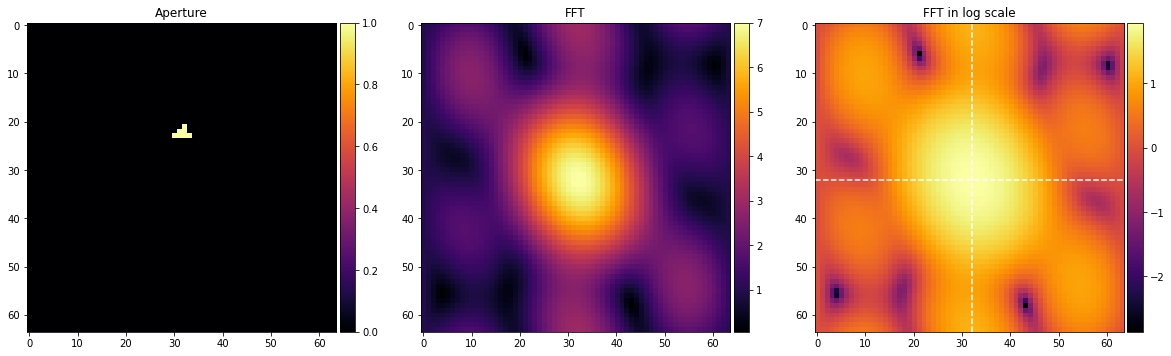

In [152]:
FFT(triangle(3))

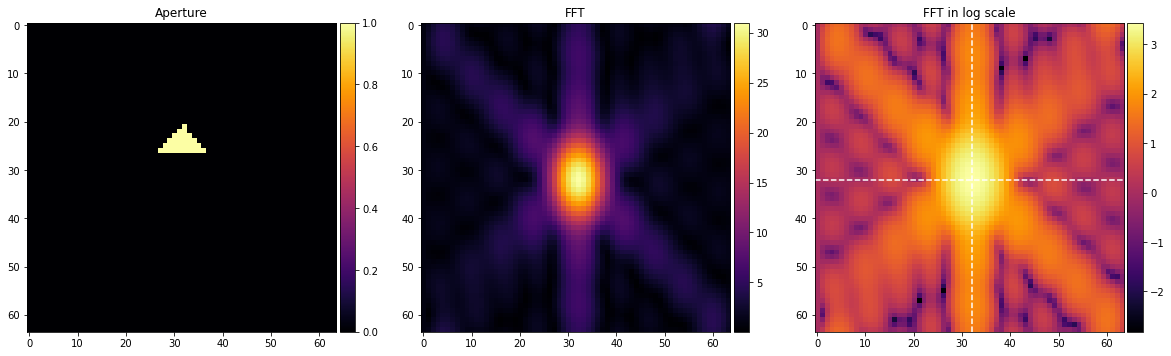

In [153]:
FFT(triangle(6))

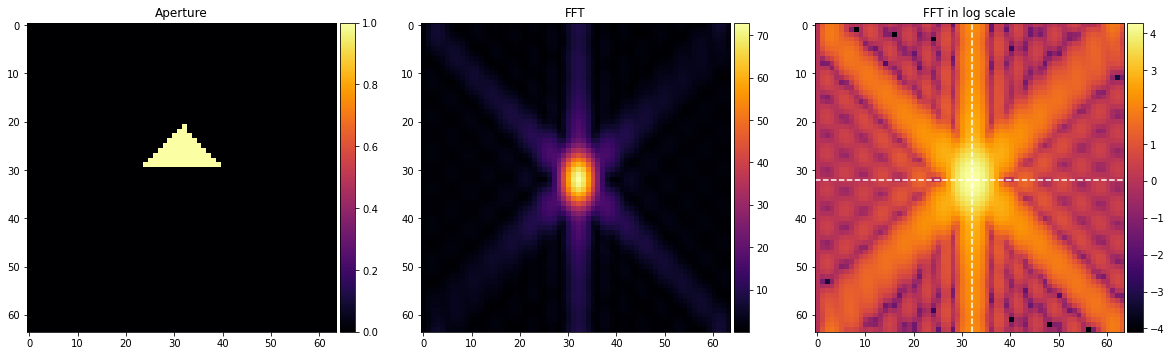

In [176]:
FFT(triangle(9))

## SCRATCH

## Guassian simulation

In [ ]:
fourier_space = -np.ones(shape=(128,128))

for f_x in range(0,64):
    for f_y in range(0,64):
        r = np.sqrt(f_x**2 + f_y**2)
        if r == 0: fourier_space[64-f_y,64+f_x] = np.random.randint(5000)
        else: fourier_space[64-f_y,64+f_x] = np.random.randint(5000)//r**2
        
        fourier_space[64-f_y,64-f_x] = np.random.randint(5000)//r**2
        fourier_space[64+f_y,64+f_x] = np.random.randint(5000)//r**2
        fourier_space[64+f_y,64-f_x] = np.random.randint(5000)//r**2

/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_61373/2360644147.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  fourier_space[64-f_y,64-f_x] = np.random.randint(5000)//r**2
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_61373/2360644147.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  fourier_space[64+f_y,64+f_x] = np.random.randint(5000)//r**2
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_61373/2360644147.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  fourier_space[64+f_y,64-f_x] = np.random.randint(5000)//r**2


/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_61373/1746536652.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(fourier_space), cmap = cmap)
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_61373/1746536652.py:9: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(fourier_space), cmap = cmap)


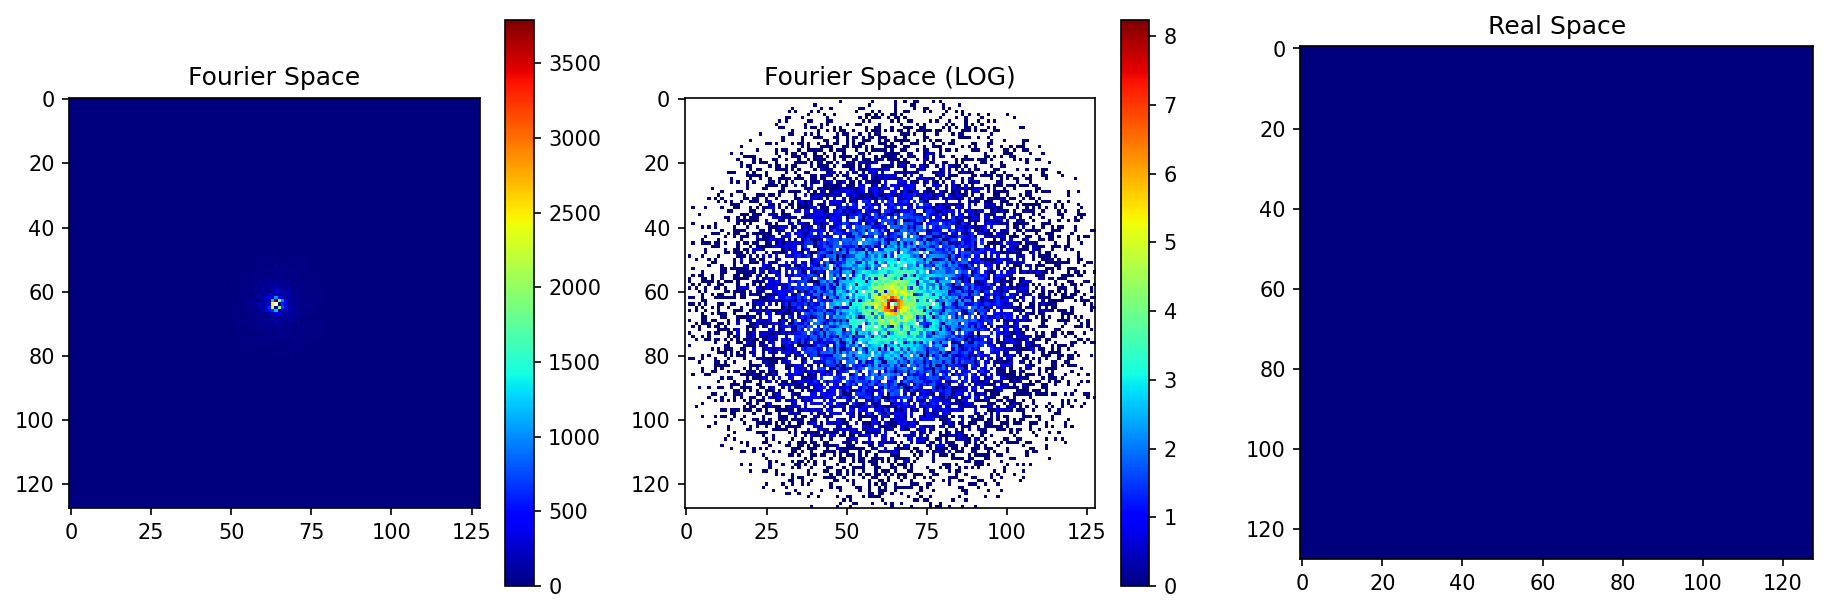

In [ ]:
cmap = 'jet'
plt.figure(dpi = 150, figsize = (15,5))
plt.subplot(131)
plt.title("Fourier Space")
plt.imshow(fourier_space, cmap = cmap)
plt.colorbar()
plt.subplot(132)
plt.title("Fourier Space (LOG)")
plt.imshow(np.log(fourier_space), cmap = cmap)
plt.colorbar()
plt.subplot(133)
plt.title("Real Space")
plt.imshow(np.abs(ifft2(np.nan_to_num(fourier_space))), cmap =cmap)